# 1. Data Understanding, preparation and pre-processing

In [1]:
# Importing the necessary packages
import numpy as np # linear algebra
import pandas as pd 
import numpy as np
import os
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


In [2]:
#Load the data set
data = pd.read_csv(r"C:\Users\KALPESH\Downloads\ml-lab-ii-c33\train.csv")
unseen = pd.read_csv(r"C:\Users\KALPESH\Downloads\ml-lab-ii-c33\test.csv")
sample = pd.read_csv(r"C:\Users\KALPESH\Downloads\ml-lab-ii-c33\sample.csv")
data_dict = pd.read_csv(r"C:\Users\KALPESH\Downloads\ml-lab-ii-c33\data_dictionary.csv")
print(data.shape)
print(unseen.shape)
print(sample.shape)

(29733, 61)
(9911, 60)
(9911, 2)


In [3]:
#Checking the description of the Data
for i in data_dict.iterrows():
    print(i[1]['column'],':',i[1]['description'])

url : URL of the article (non-predictive)
timedelta : Days between the article publication and the dataset acquisition (non-predictive)
ntokenstitle : Number of words in the title
ntokenscontent : Number of words in the content
nuniquetokens : Rate of unique words in the content
nnonstop_words : Rate of non-stop words in the content
nnonstopuniquetokens : Rate of unique non-stop words in the content
num_hrefs : Number of links
numselfhrefs : Number of links to other articles published by Mashable
num_imgs : Number of images
num_videos : Number of videos
averagetokenlength : Average length of the words in the content
numkeywords : Number of keywords in the metadata
datachannelislifestyle : Is data channel 'Lifestyle'?
datachannelis_entertainment : Is data channel 'Entertainment'?
datachannelis_bus : Is data channel 'Business'?
datachannelis_socmed : Is data channel 'Social Media'?
datachannelis_tech : Is data channel 'Tech'?
datachannelis_world : Is data channel 'World'?
kwminmin : Wors

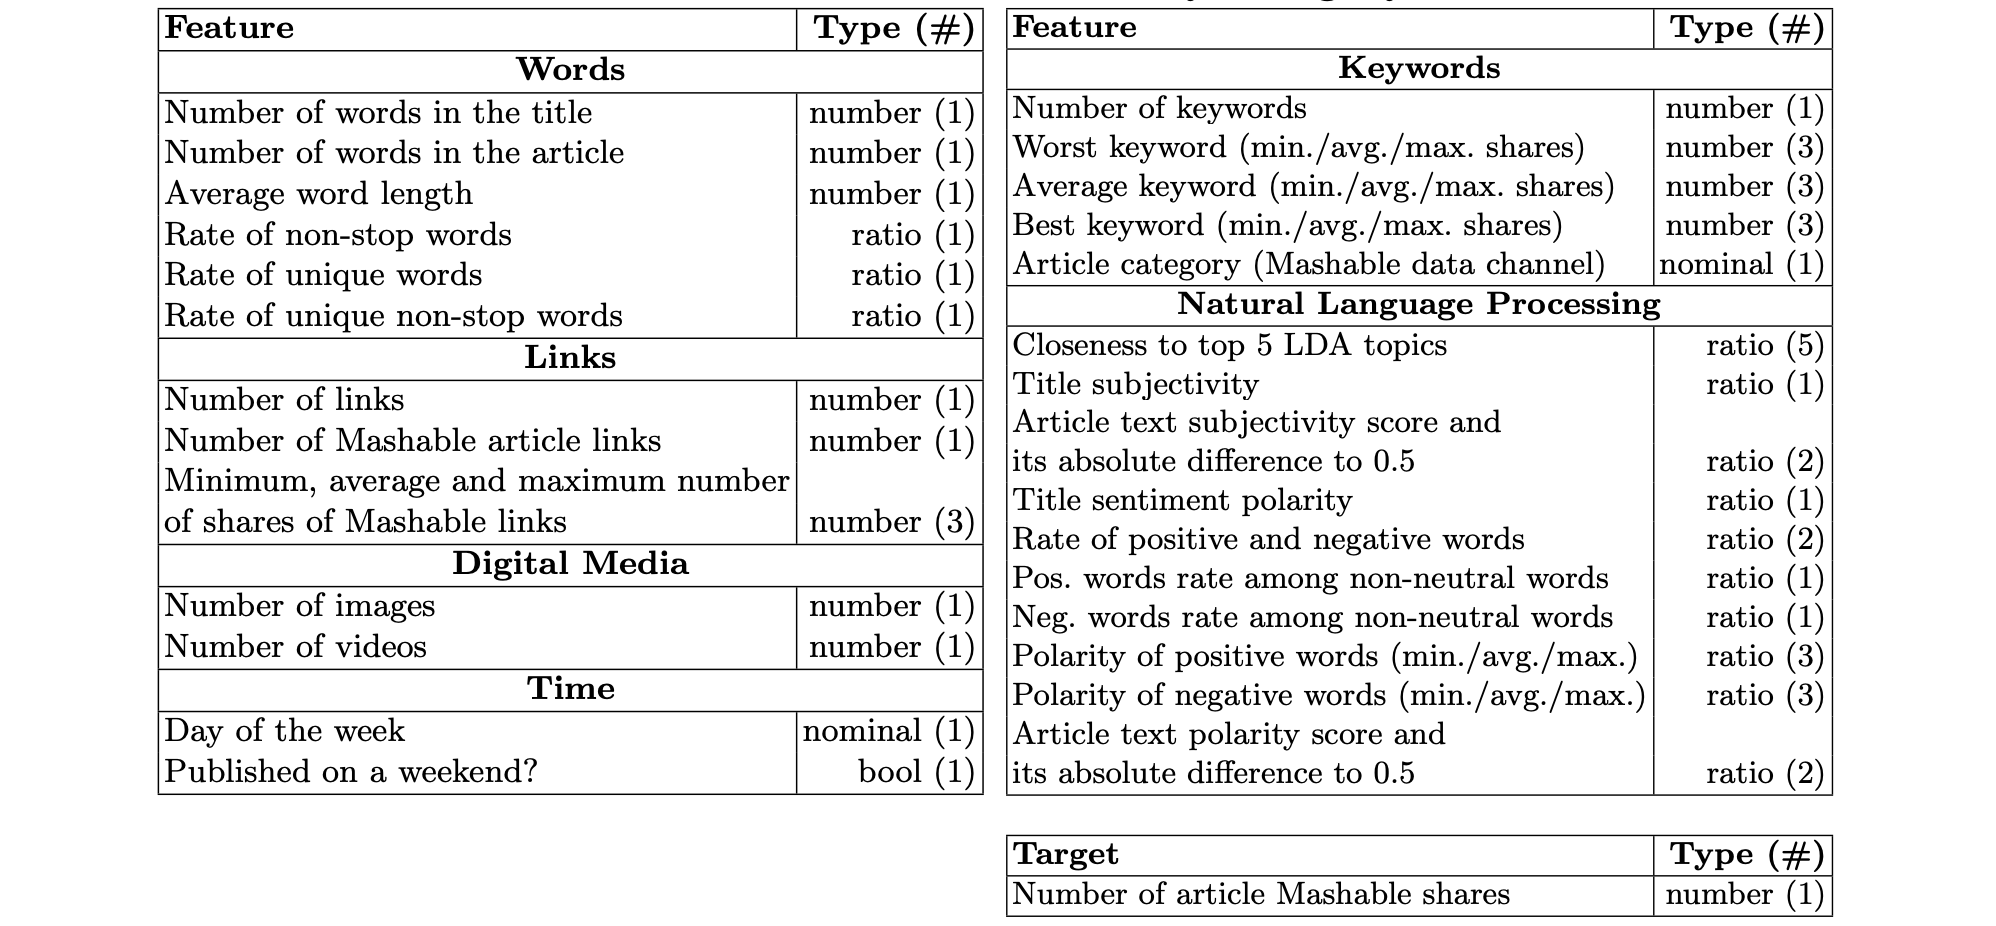

In [4]:
Image(filename=r"C:\Users\KALPESH\Downloads\ml-lab-ii-c33\features.png")

In [5]:
#Head
data.head()

id                                                url  n_tokens_title  \
0   0  http://mashable.com/2013/03/15/build-arduino-p...             8.0   
1   1   http://mashable.com/2013/09/04/edible-bar-codes/            12.0   
2   2  http://mashable.com/2014/06/20/non-player-char...             7.0   
3   3  http://mashable.com/2014/08/06/food-art-vine-c...             9.0   
4   4  http://mashable.com/2014/12/17/blackberry-clas...            13.0   

   n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             211.0         0.629808               1.0   
1             416.0         0.603535               1.0   
2             229.0         0.638393               1.0   
3             473.0         0.542373               1.0   
4            1097.0         0.505213               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.800000        6.0             3.0       0.0         0.0   
1                  0.663580       22.0             7.0       1.0        16.0   
2                  0.746479        9.0             4.0       1.0         1.0   
3                  0.752809        7.0             0.0       1.0         1.0   
4                  0.676343       10.0             4.0      14.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.606635           8.0                        0.0   
1              5.004808           7.0                        0.0   
2              4.829694           8.0                        0.0   
3              4.634249           7.0                        0.0   
4              4.678213           4.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            0.0                  0.0                     0.0   
1                            1.0                  0.0                     0.0   
2                            0.0                  0.0                     0.0   
3                            0.0                  0.0                     0.0   
4                            1.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   1.0                    0.0       217.0      2300.0   
1                   0.0                    0.0         4.0       768.0   
2                   1.0                    0.0        -1.0      1100.0   
3                   1.0                    0.0        -1.0       447.0   
4                   0.0                    0.0        -1.0      1200.0   

   kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
0  797.714286         0.0    617900.0  115912.500000     0.000000   
1  259.400000         0.0         NaN  169071.428571     0.000000   
2  472.625000      4800.0    843300.0  204837.500000  1575.400000   
3  150.400000         0.0    843300.0  229728.571429     0.000000   
4  299.250000     33100.0    843300.0  381925.000000  2822.635182   

    kw_max_avg   kw_avg_avg  self_reference_min_shares  \
0  5103.042553  2568.648709                     2000.0   
1  3339.790199  2112.665837                      658.0   
2  3562.101631  2589.125480                     4800.0   
3  3504.933802          NaN                        0.0   
4  5418.750000  3668.285640                     1400.0   

   self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  \
0                     2000.0                     2000.00                0.0   
1                    13700.0                     4477.25                0.0   
2                        NaN                     4800.00                0.0   
3                        0.0                        0.00                0.0   
4                     2300.0                     2000.00                0.0   

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0                 0.0                   0.0                  0.0   


In [6]:
#Details of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [7]:
data.describe()

id  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  29733.000000    29733.000000      29733.000000     29733.000000   
mean   14866.000000       10.403861        545.376652         0.554071   
std     8583.322113        2.122101        471.476136         4.064623   
min        0.000000        2.000000          0.000000         0.000000   
25%     7433.000000        9.000000        245.000000         0.471376   
50%    14866.000000       10.000000        407.000000         0.540000   
75%    22299.000000       12.000000        714.000000         0.609053   
max    29732.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      29733.000000              29733.000000  28921.000000   
mean           1.004238                  0.694586     10.866706   
std            6.039790                  3.768884     11.384882   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.626598      4.000000   
50%            1.000000                  0.691275      7.000000   
75%            1.000000                  0.754545     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    25200.000000  24326.000000  29146.000000          29733.000000   
mean         3.285397      4.512785      1.263364              4.542961   
std          3.851624      8.335517      4.158469              0.855936   
min          0.000000      0.000000      0.000000              0.000000   
25%          1.000000      1.000000      0.000000              4.477124   
50%          3.000000      1.000000      0.000000              4.663717   
75%          4.000000      4.000000      1.000000              4.854545   
max        116.000000    128.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  29269.000000               29733.000000                   29733.000000   
mean       7.217978                   0.052669                       0.175327   
std        1.912259                   0.223375                       0.380253   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         29733.000000            29733.000000          29733.000000   
mean              0.158275                0.058386              0.185047   
std               0.365005                0.234476              0.388342   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           29733.000000  28649.000000   29277.000000  29649.000000   
mean                0.213870     25.835945    1154.769238    311.128475   
std                 0.410043     69.316700    4008.595967    623.943555   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     444.000000    141.000000   
50%                 0.000000     -1.000000     659.000000    234.000000   
75%                 0.000000      4.000000    1000.000000    355.125000   
max                 1.000000    377.000000  298400.0000

## 2.  Handling Missing data

#First lets analyse the missing data. We can use missingno library for quick visualizations

In [8]:
data.isna().sum().sort_values(ascending=False)

num_imgs                         5407
num_self_hrefs                   4533
global_subjectivity              2246
is_weekend                       2168
self_reference_max_shares        1762
weekday_is_wednesday             1554
kw_max_max                       1515
weekday_is_sunday                1496
abs_title_sentiment_polarity     1457
avg_positive_polarity            1238
kw_min_min                       1084
weekday_is_monday                 981
kw_avg_avg                        973
global_rate_negative_words        888
weekday_is_friday                 866
global_rate_positive_words        835
num_hrefs                         812
abs_title_subjectivity            799
min_negative_polarity             782
weekday_is_tuesday                753
max_negative_polarity             712
kw_max_avg                        681
rate_negative_words               593
num_videos                        587
rate_positive_words               587
num_keywords                      464
kw_max_min  

In [9]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.73
num_self_hrefs                   15.25
num_imgs                         18.19
num_videos                        1.97
average_token_length              0.00
num_keywords                      1.56
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.65
kw_max_min                        1.53
kw_avg_min                        0.28
kw_min_max                        0.46
kw_max_max                        5.10
kw_avg_max                        0.39
kw_min_avg               

<AxesSubplot:>

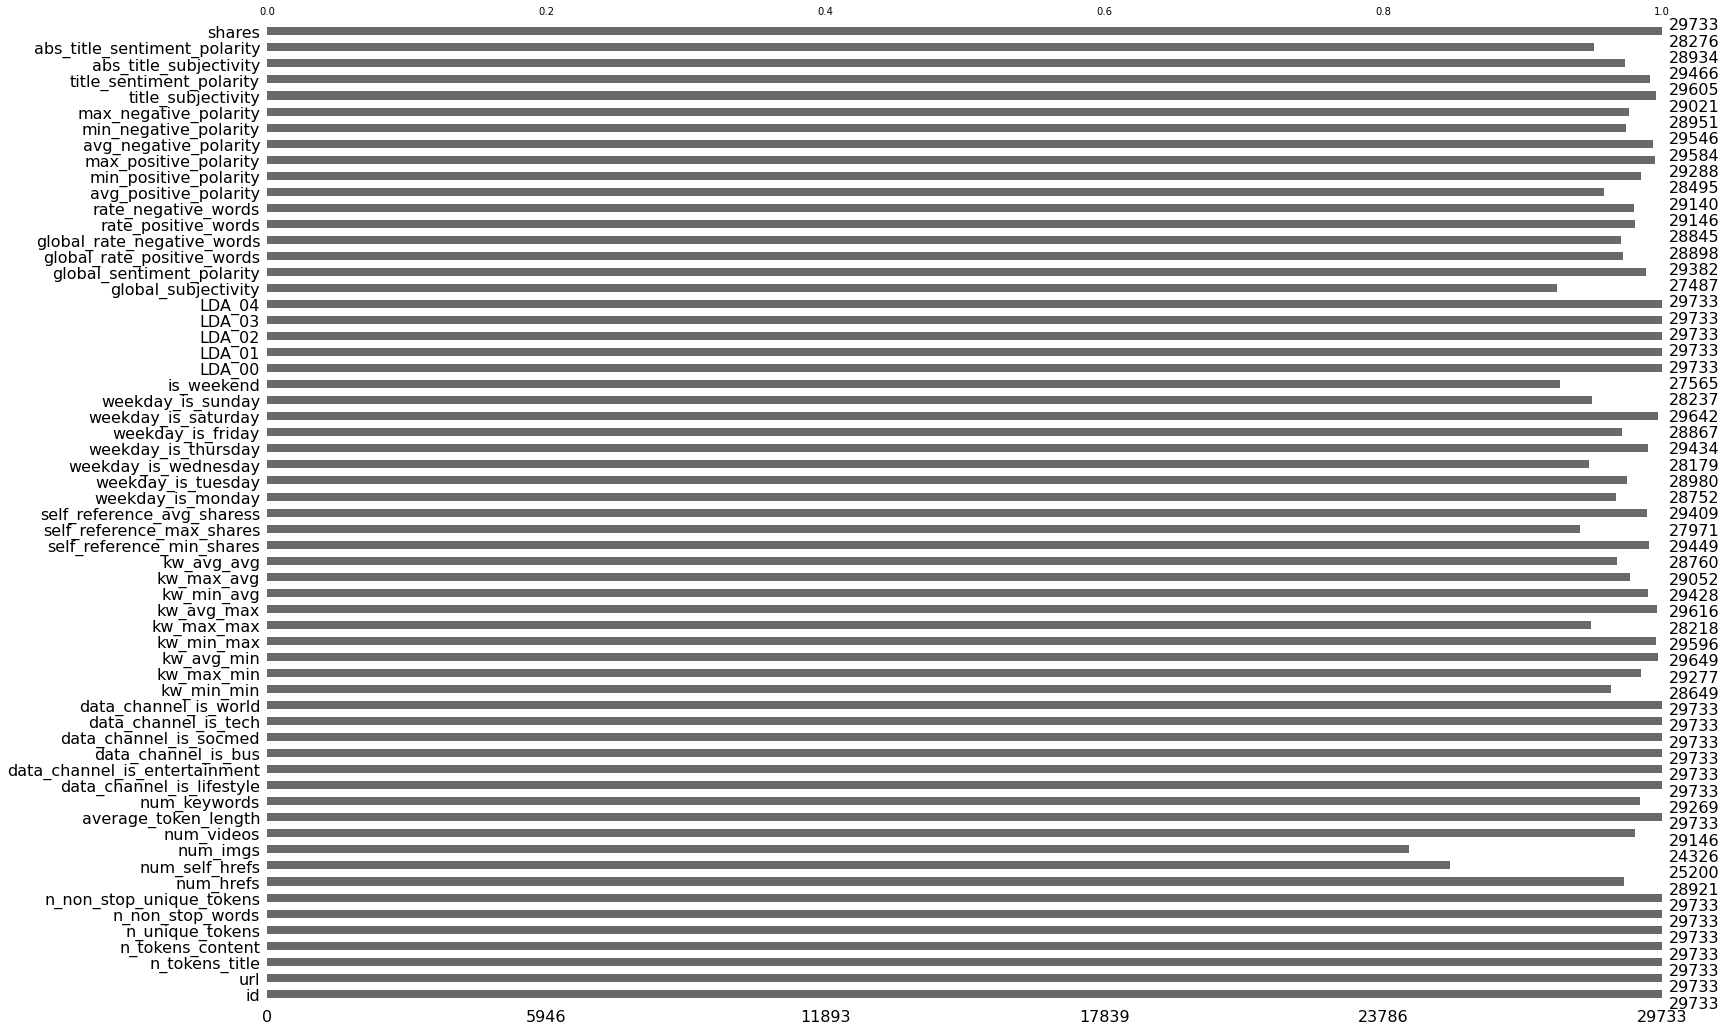

In [10]:
import missingno as msno
msno.bar(data)

<AxesSubplot:>

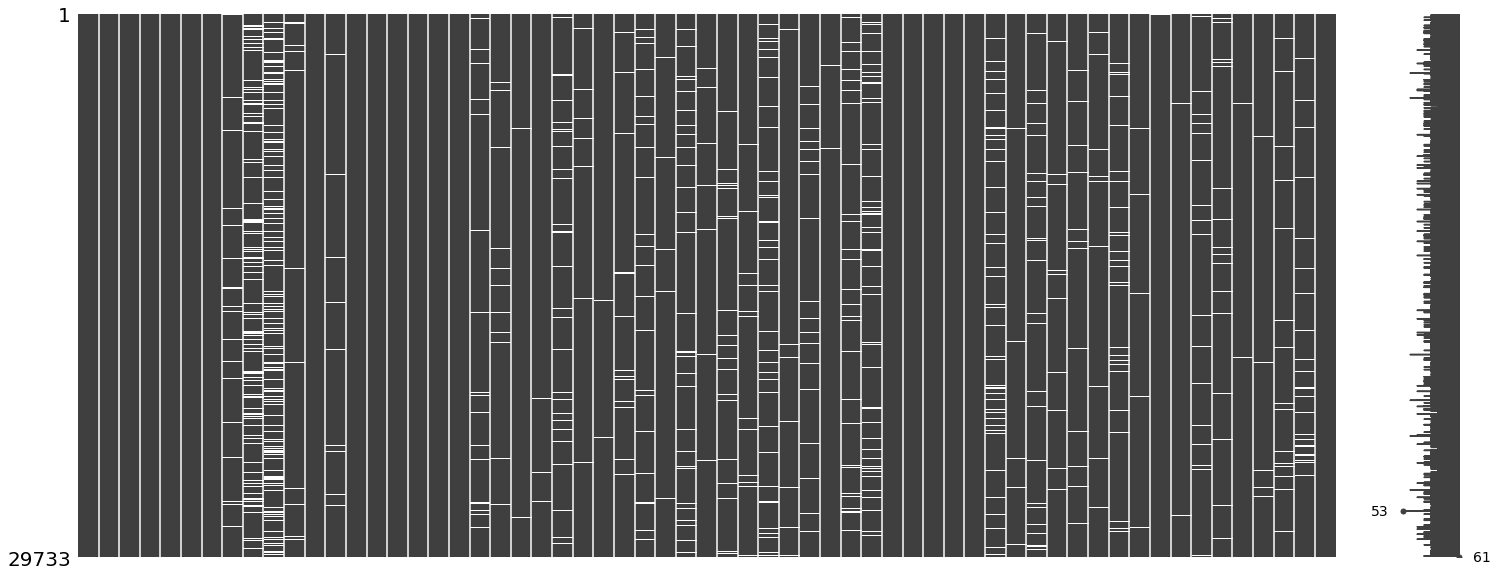

In [11]:
msno.matrix(data)

<AxesSubplot:>

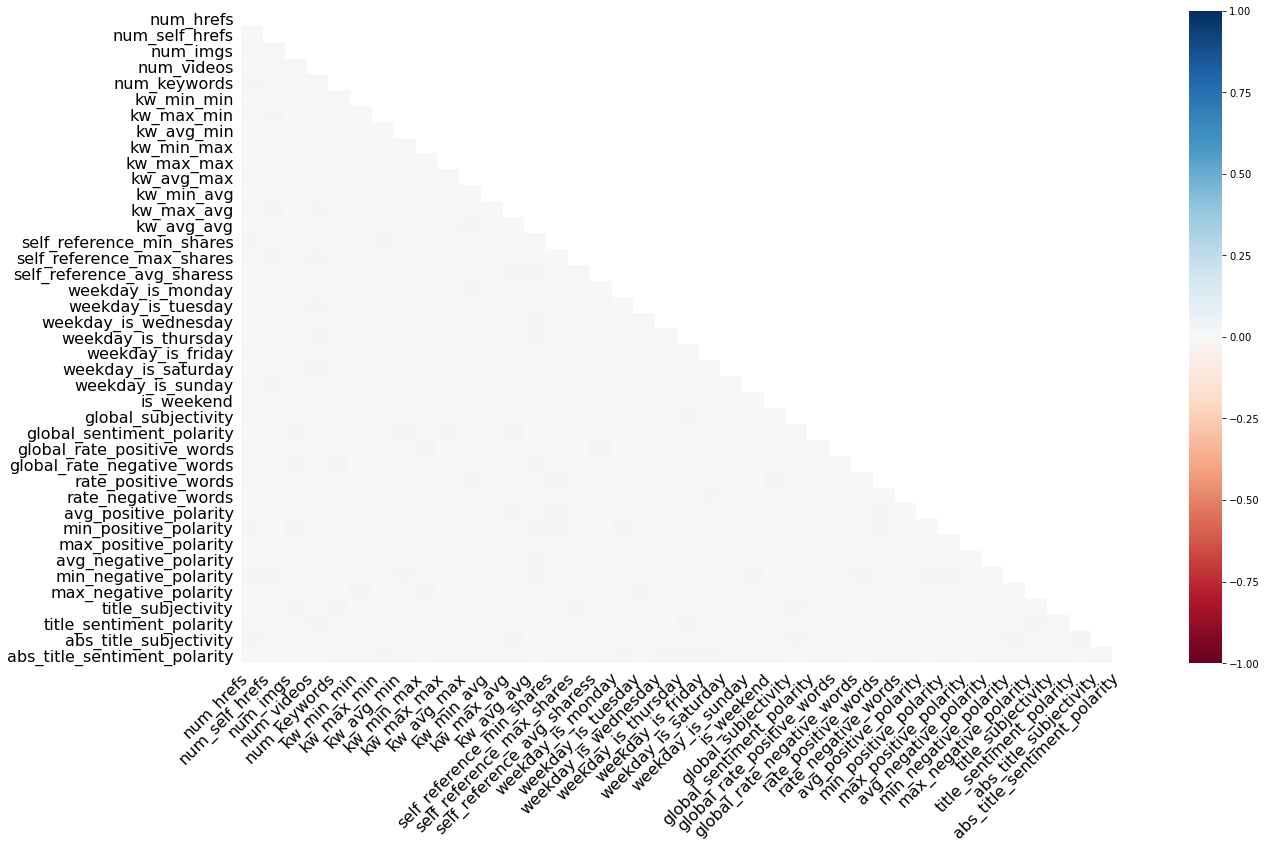

In [12]:
msno.heatmap(data)

In [13]:
# Checking if there are columns with one unique value since it won't affect our analysis
data.nunique(dropna=True)

id                               29733
url                              29733
n_tokens_title                      20
n_tokens_content                  2250
n_unique_tokens                  21820
n_non_stop_words                  1404
n_non_stop_unique_tokens         18703
num_hrefs                          124
num_self_hrefs                      55
num_imgs                            86
num_videos                          52
average_token_length             23555
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          23
kw_max_min                        1038
kw_avg_min                       14367
kw_min_max                         957
kw_max_max                          30
kw_avg_max                       24057
kw_min_avg               

In [14]:
# imputing missing values
missing_data_percent=round(100 *(data.isnull().sum()/len(data.index)),2)
impute_features = missing_data_percent[missing_data_percent.gt(0)].index
impute_features

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [15]:
# Imputed with KNN Imputer
imp= KNNImputer()
data[impute_features] = imp.fit_transform(data[impute_features])

In [16]:
#Checking the Null values again 
round(100 *(data.isnull().sum()/len(data.index)),2)


id                               0.0
url                              0.0
n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
k

In [17]:
data.describe()

id  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  29733.000000    29733.000000      29733.000000     29733.000000   
mean   14866.000000       10.403861        545.376652         0.554071   
std     8583.322113        2.122101        471.476136         4.064623   
min        0.000000        2.000000          0.000000         0.000000   
25%     7433.000000        9.000000        245.000000         0.471376   
50%    14866.000000       10.000000        407.000000         0.540000   
75%    22299.000000       12.000000        714.000000         0.609053   
max    29732.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      29733.000000              29733.000000  29733.000000   
mean           1.004238                  0.694586     10.840897   
std            6.039790                  3.768884     11.264289   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.626598      4.000000   
50%            1.000000                  0.691275      8.000000   
75%            1.000000                  0.754545     13.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    29733.000000  29733.000000  29733.000000          29733.000000   
mean         3.256052      4.437171      1.259126              4.542961   
std          3.649669      7.760119      4.125330              0.855936   
min          0.000000      0.000000      0.000000              0.000000   
25%          1.000000      1.000000      0.000000              4.477124   
50%          2.800000      1.000000      0.000000              4.663717   
75%          4.000000      4.800000      1.000000              4.854545   
max        116.000000    128.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  29733.000000               29733.000000                   29733.000000   
mean       7.216641                   0.052669                       0.175327   
std        1.902952                   0.223375                       0.380253   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         29733.000000            29733.000000          29733.000000   
mean              0.158275                0.058386              0.185047   
std               0.365005                0.234476              0.388342   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           29733.000000  29733.000000   29733.000000  29733.000000   
mean                0.213870     25.828857    1150.191069    310.988499   
std                 0.410043     69.103488    3979.238531    623.112651   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     447.000000    141.200000   
50%                 0.000000     -1.000000     661.000000    234.000000   
75%                 0.000000      4.000000    1000.000000    355.000000   
max                 1.000000    377.000000  298400.0000

<AxesSubplot:>

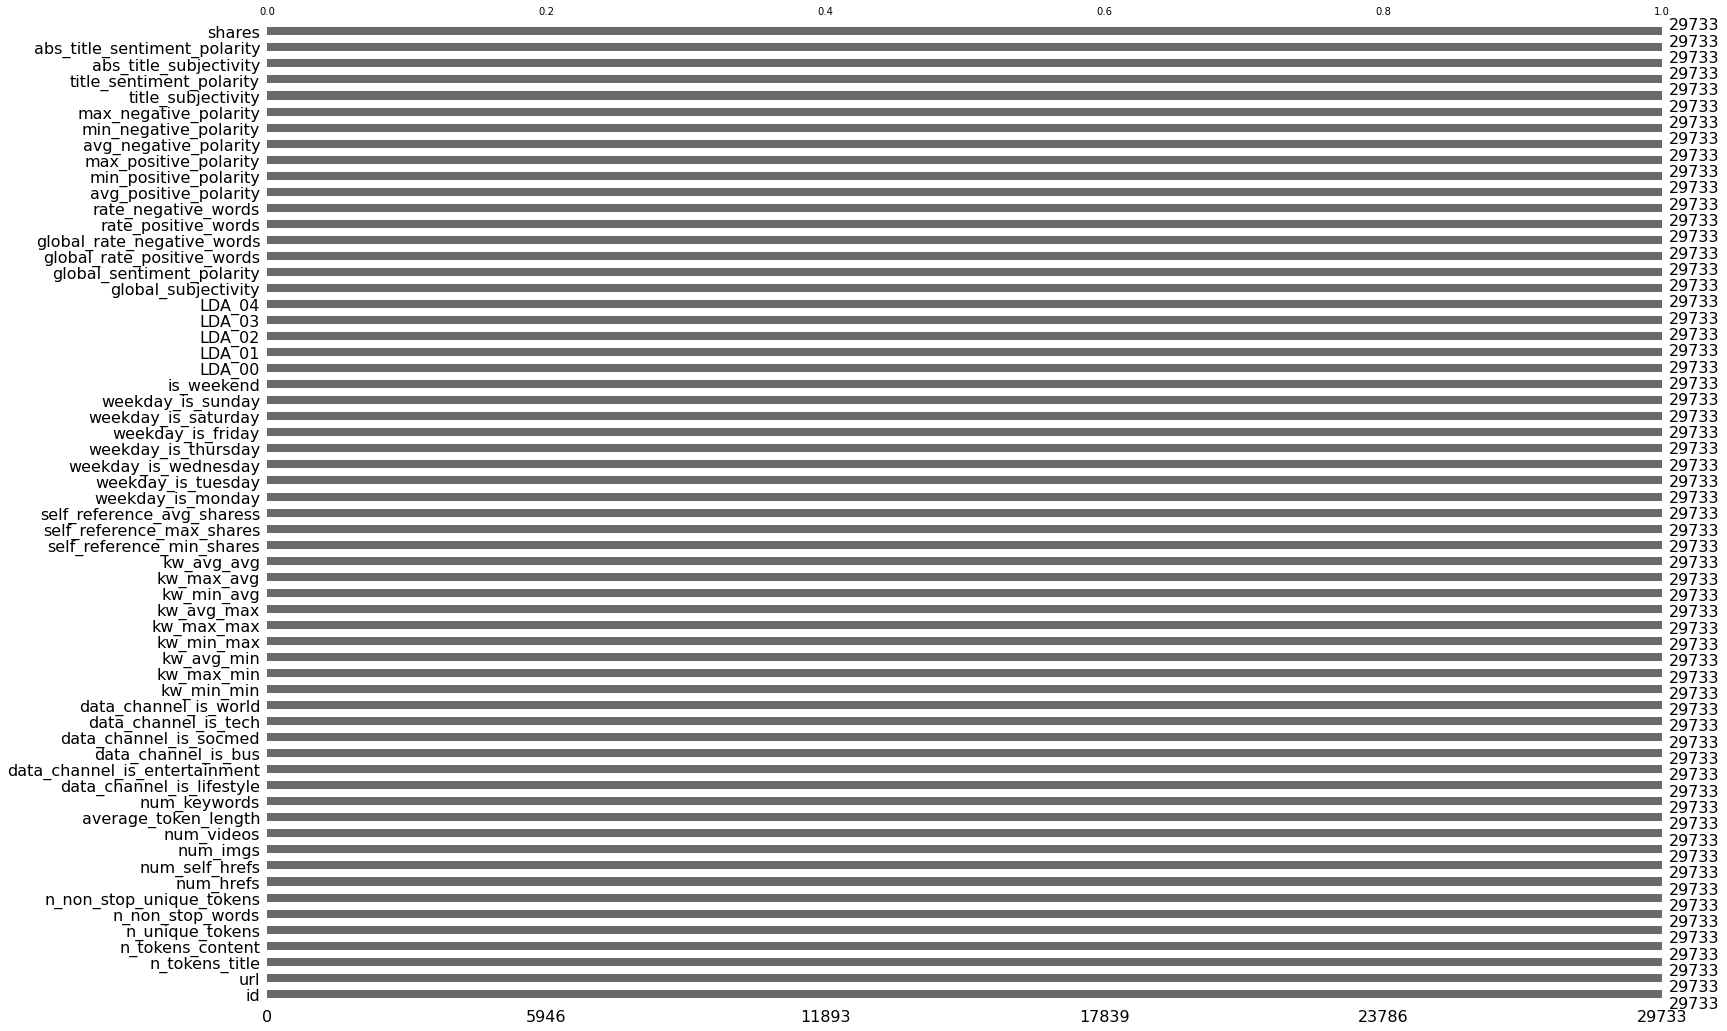

In [18]:
msno.bar(data)

#There are no NULL values

# 3. Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

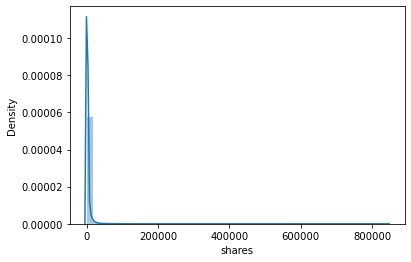

In [19]:
sns.distplot(data['shares'])
plt.show()

<AxesSubplot:xlabel='shares', ylabel='count'>

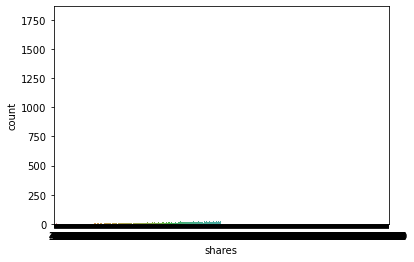

In [20]:
sns.countplot(x="shares",data = data)

#Data is skewed, therefore taking Log function

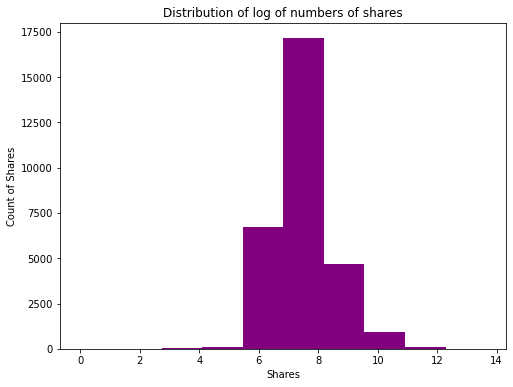

In [21]:
# choose features and target
X = data.iloc[:,2:60] # select all columns except URL and TARGET
y = data["shares"].values.ravel() #target:number of shares
plt.figure(figsize= (8,6))
plt.hist(np.log(y),color="purple")
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of log of numbers of shares")
plt.show()


In [22]:
data.corr(method ='pearson').sum().sort_values(ascending=False)

avg_positive_polarity            5.237645
max_positive_polarity            5.139347
global_subjectivity              4.662096
kw_avg_avg                       4.115509
average_token_length             3.959234
global_rate_positive_words       3.789759
kw_max_avg                       3.727704
global_sentiment_polarity        3.711983
num_hrefs                        3.617255
self_reference_max_shares        3.550782
rate_positive_words              3.536926
self_reference_avg_sharess       3.533051
n_non_stop_words                 3.028307
kw_max_min                       3.026285
n_tokens_content                 3.019654
n_non_stop_unique_tokens         2.998555
n_unique_tokens                  2.973305
kw_avg_min                       2.955265
num_self_hrefs                   2.936795
self_reference_min_shares        2.664035
num_imgs                         2.629556
abs_title_sentiment_polarity     2.502340
kw_min_avg                       2.324451
title_sentiment_polarity         2

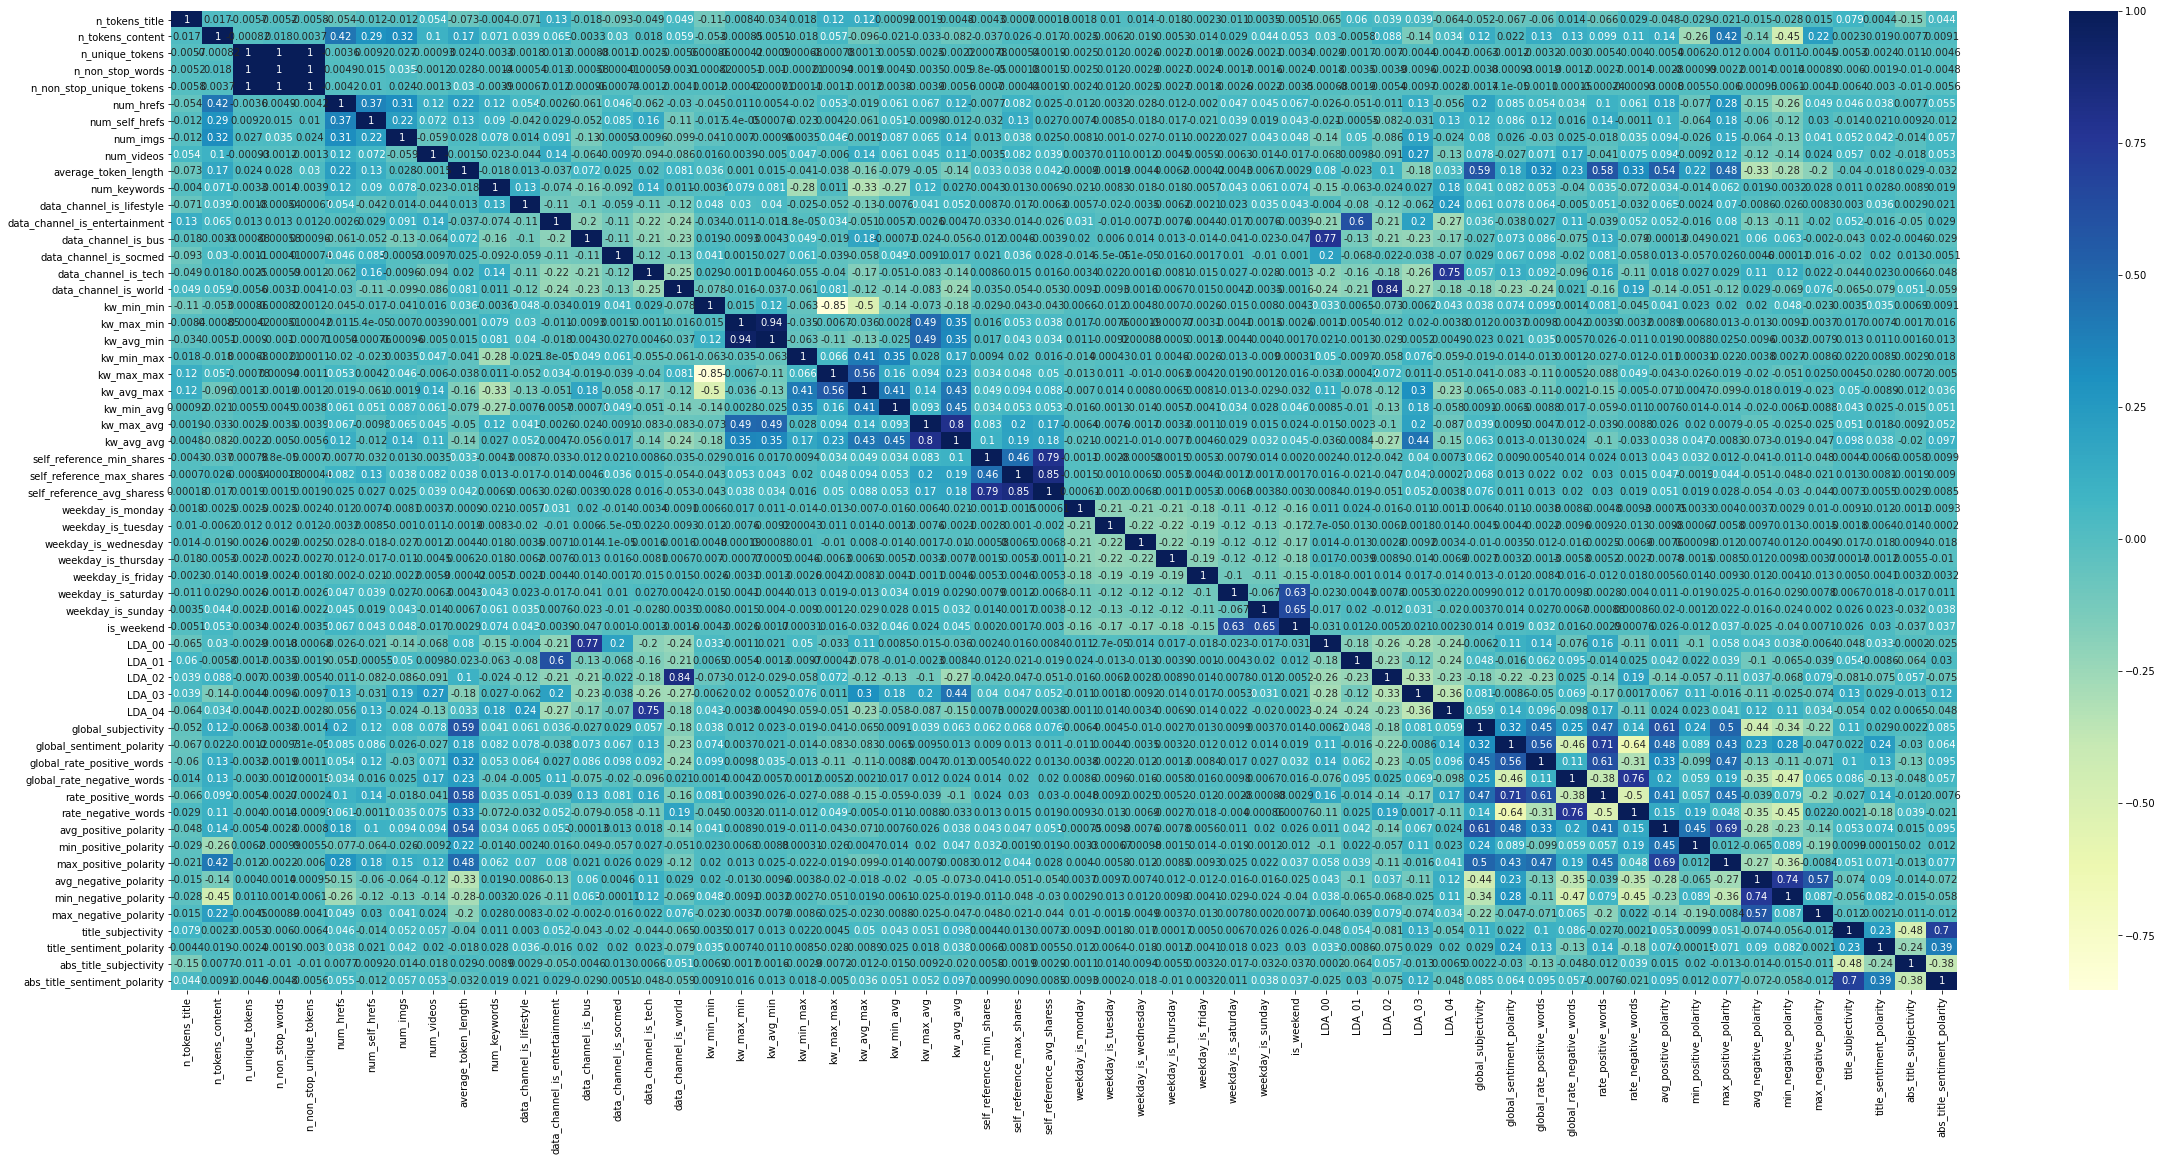

In [23]:
# plot the feature correlation heatmap
plt.figure(figsize=(40,18))
sns.heatmap(X.corr(),cmap="YlGnBu",annot=True) 
plt.show()

In [24]:
cor_matrix = data.corr().abs()
print(cor_matrix)

                                     id  n_tokens_title  n_tokens_content  \
id                             1.000000        0.003322          0.004220   
n_tokens_title                 0.003322        1.000000          0.016609   
n_tokens_content               0.004220        0.016609          1.000000   
n_unique_tokens                0.004725        0.005735          0.000818   
n_non_stop_words               0.004940        0.005177          0.018492   
n_non_stop_unique_tokens       0.004727        0.005801          0.003676   
num_hrefs                      0.004986        0.054012          0.422250   
num_self_hrefs                 0.001465        0.011566          0.292683   
num_imgs                       0.018744        0.011940          0.322433   
num_videos                     0.007037        0.053812          0.101880   
average_token_length           0.007341        0.073226          0.171554   
num_keywords                   0.004986        0.004013          0.071456   

There are columns with high correlation

In [25]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                               id  n_tokens_title  n_tokens_content  \
id                            NaN        0.003322          0.004220   
n_tokens_title                NaN             NaN          0.016609   
n_tokens_content              NaN             NaN               NaN   
n_unique_tokens               NaN             NaN               NaN   
n_non_stop_words              NaN             NaN               NaN   
n_non_stop_unique_tokens      NaN             NaN               NaN   
num_hrefs                     NaN             NaN               NaN   
num_self_hrefs                NaN             NaN               NaN   
num_imgs                      NaN             NaN               NaN   
num_videos                    NaN             NaN               NaN   
average_token_length          NaN             NaN               NaN   
num_keywords                  NaN             NaN               NaN   
data_channel_is_lifestyle     NaN             NaN               NaN   
data_c

Droping the column with high correlation above 85%

In [26]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.84)]
print(); print(to_drop)


['n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min', 'kw_max_max', 'self_reference_avg_sharess']


In [27]:
data=data.drop(['n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min', 'kw_max_max', 'self_reference_avg_sharess'], axis = 1)
data.head()

id                                                url  n_tokens_title  \
0   0  http://mashable.com/2013/03/15/build-arduino-p...             8.0   
1   1   http://mashable.com/2013/09/04/edible-bar-codes/            12.0   
2   2  http://mashable.com/2014/06/20/non-player-char...             7.0   
3   3  http://mashable.com/2014/08/06/food-art-vine-c...             9.0   
4   4  http://mashable.com/2014/12/17/blackberry-clas...            13.0   

   n_tokens_content  n_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0             211.0         0.629808        6.0             3.0       0.0   
1             416.0         0.603535       22.0             7.0       1.0   
2             229.0         0.638393        9.0             4.0       1.0   
3             473.0         0.542373        7.0             0.0       1.0   
4            1097.0         0.505213       10.0             4.0      14.0   

   num_videos  average_token_length  num_keywords  data_channel_is_lifestyle  \
0         0.0              4.606635           8.0                        0.0   
1        16.0              5.004808           7.0                        0.0   
2         1.0              4.829694           8.0                        0.0   
3         1.0              4.634249           7.0                        0.0   
4         0.0              4.678213           4.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            0.0                  0.0                     0.0   
1                            1.0                  0.0                     0.0   
2                            0.0                  0.0                     0.0   
3                            0.0                  0.0                     0.0   
4                            1.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   1.0                    0.0       217.0      2300.0   
1                   0.0                    0.0         4.0       768.0   
2                   1.0                    0.0        -1.0      1100.0   
3                   1.0                    0.0        -1.0       447.0   
4                   0.0                    0.0        -1.0      1200.0   

   kw_min_max     kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0         0.0  115912.500000     0.000000  5103.042553  2568.648709   
1         0.0  169071.428571     0.000000  3339.790199  2112.665837   
2      4800.0  204837.500000  1575.400000  3562.101631  2589.125480   
3         0.0  229728.571429     0.000000  3504.933802  2258.367130   
4     33100.0  381925.000000  2822.635182  5418.750000  3668.285640   

   self_reference_min_shares  self_reference_max_shares  weekday_is_monday  \
0                     2000.0                     2000.0                0.0   
1                      658.0                    13700.0                0.0   
2                     4800.0                     4680.0                0.0   
3                        0.0                        0.0                0.0   
4                     1400.0                     2300.0                0.0   

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0                 0.0                   0.0                  0.0   
1                 0.0                   1.0                  0.0   
2                 0.0                   0.0                  0.0   
3                 0.0                   1.0                  0.0   
4                 0.0                   0.0                  1.0   

   weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend  \
0                1.0                  0.0                0.0         0.0   
1                0.2                  0.0                0.0         0.0   
2                1.0                  0.0                0.0         0.0   
3                0.2                  0.0                0.0 

In [28]:
X=X.drop(['n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min', 'kw_max_max', 'self_reference_avg_sharess'], axis = 1)
X.head()

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0             8.0             211.0         0.629808        6.0   
1            12.0             416.0         0.603535       22.0   
2             7.0             229.0         0.638393        9.0   
3             9.0             473.0         0.542373        7.0   
4            13.0            1097.0         0.505213       10.0   

   num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
0             3.0       0.0         0.0              4.606635           8.0   
1             7.0       1.0        16.0              5.004808           7.0   
2             4.0       1.0         1.0              4.829694           8.0   
3             0.0       1.0         1.0              4.634249           7.0   
4             4.0      14.0         0.0              4.678213           4.0   

   data_channel_is_lifestyle  data_channel_is_entertainment  \
0                        0.0                            0.0   
1                        0.0                            1.0   
2                        0.0                            0.0   
3                        0.0                            0.0   
4                        0.0                            1.0   

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                  0.0                     0.0                   1.0   
1                  0.0                     0.0                   0.0   
2                  0.0                     0.0                   1.0   
3                  0.0                     0.0                   1.0   
4                  0.0                     0.0                   0.0   

   data_channel_is_world  kw_min_min  kw_max_min  kw_min_max     kw_avg_max  \
0                    0.0       217.0      2300.0         0.0  115912.500000   
1                    0.0         4.0       768.0         0.0  169071.428571   
2                    0.0        -1.0      1100.0      4800.0  204837.500000   
3                    0.0        -1.0       447.0         0.0  229728.571429   
4                    0.0        -1.0      1200.0     33100.0  381925.000000   

    kw_min_avg   kw_max_avg   kw_avg_avg  self_reference_min_shares  \
0     0.000000  5103.042553  2568.648709                     2000.0   
1     0.000000  3339.790199  2112.665837                      658.0   
2  1575.400000  3562.101631  2589.125480                     4800.0   
3     0.000000  3504.933802  2258.367130                        0.0   
4  2822.635182  5418.750000  3668.285640                     1400.0   

   self_reference_max_shares  weekday_is_monday  weekday_is_tuesday  \
0                     2000.0                0.0                 0.0   
1                    13700.0                0.0                 0.0   
2                     4680.0                0.0                 0.0   
3                        0.0                0.0                 0.0   
4                     2300.0                0.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                1.0   
1                   1.0                  0.0                0.2   
2                   0.0                  0.0                1.0   
3                   1.0                  0.0                0.2   
4                   0.0                  1.0                0.0   

   weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01  \
0                  0.0                0.0         0.0  0.025025  0.025047   
1                  0.0                0.0         0.0  0.170984  0.029080   
2                  0.0                0.0         0.0  0.025046  0.025041   
3                  0.0                0.0         0.0  0.028580  0.028581   
4                  0.0                0.0         0.0  0.050004  0.052276   

     LDA_02    LDA_03    LDA_04  global_subjectivity  \
0  0.025012  0.025377  0.899540             0.647421   
1  0.0

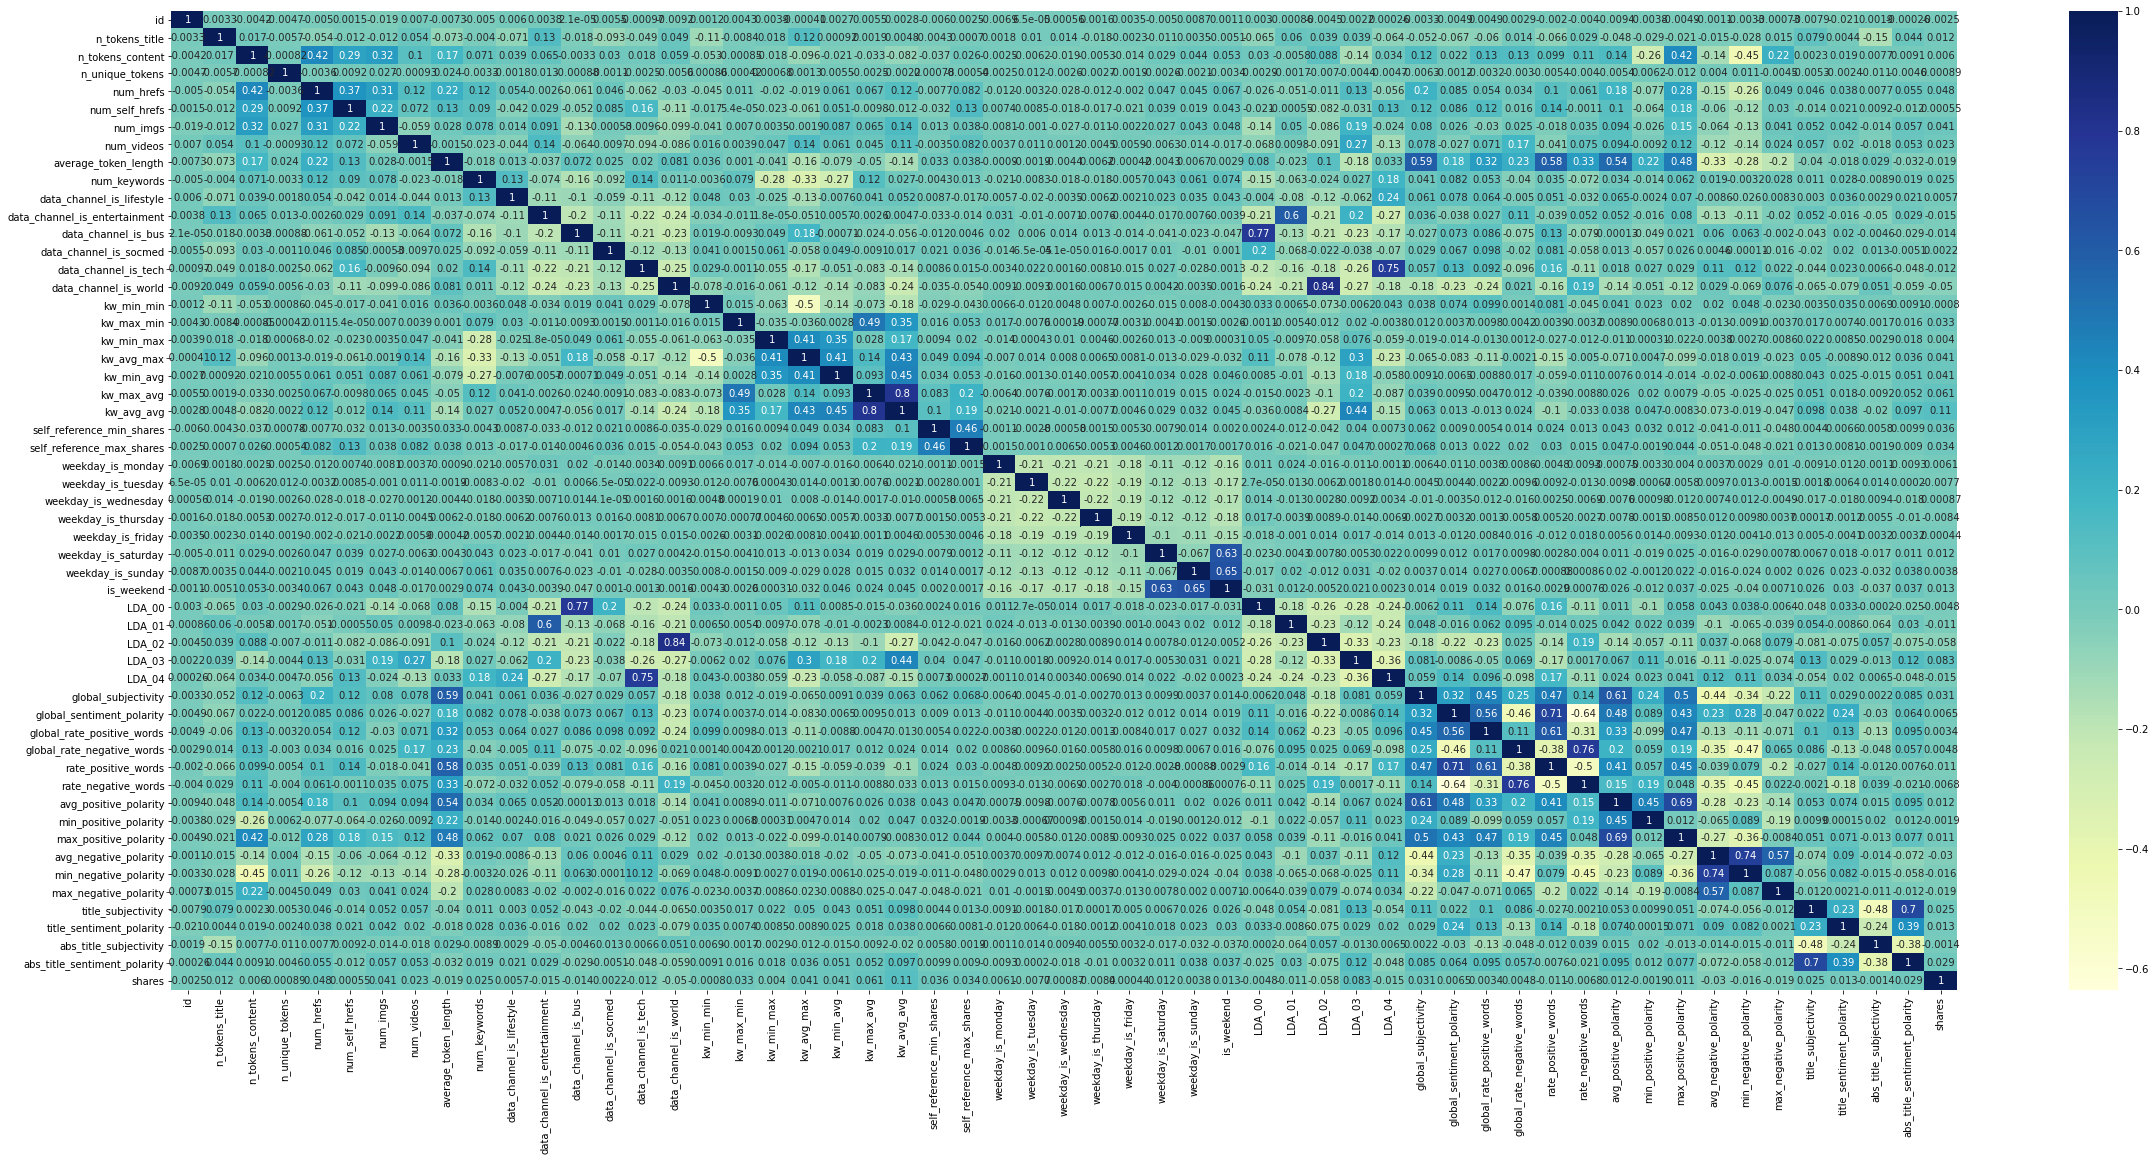

In [29]:
# plot the feature correlation heatmap
plt.figure(figsize=(40,18))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True) 
plt.show()

Issue of Multicolinrity Resolved

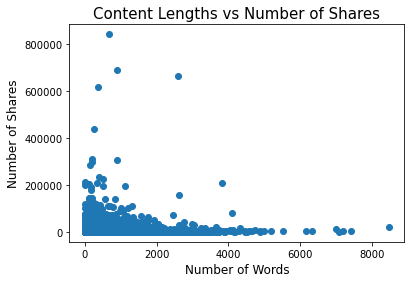

In [30]:
# number of words in the content vs number of shares
plt.scatter(data["n_tokens_content"], data["shares"])
plt.title("Content Lengths vs Number of Shares", size=15)
plt.xlabel("Number of Words", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

With the increase in number of words in the content thre is increase in number of shares

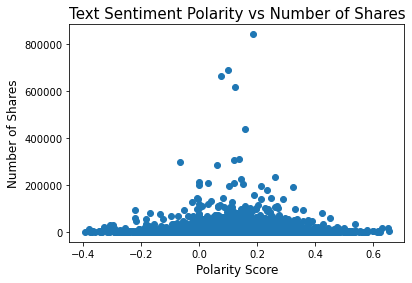

In [31]:
# text sentiment polarity vs number of shares
plt.scatter(data["global_sentiment_polarity"], data["shares"])
plt.title("Text Sentiment Polarity vs Number of Shares", size=15)
plt.xlabel("Polarity Score", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

we can see when the text sentiment polarity score is more, teh number of share is also more in such scenarios

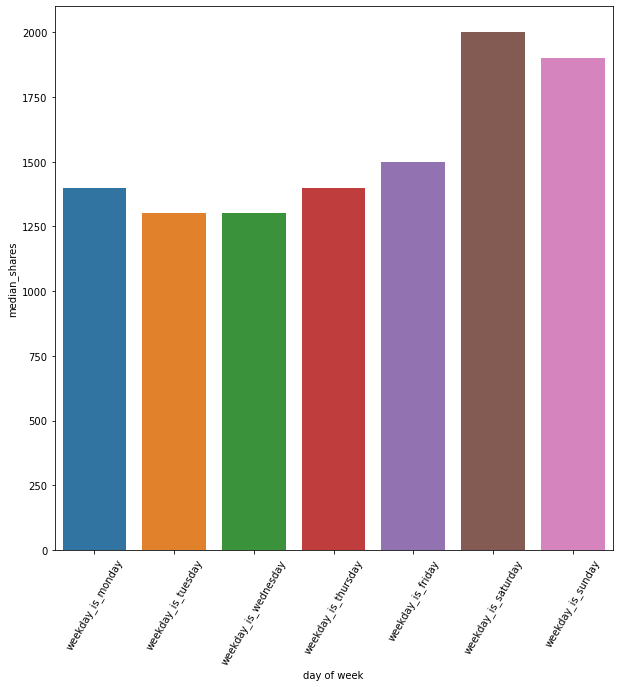

In [32]:
plt.figure(figsize= (10,10))
shares = []
cols = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday']
for d in cols:
    shares.append(data[data[d] == 1]['shares'].median())

ax = sns.barplot(x = cols, y = shares)
ax.set(xlabel = 'day of week', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

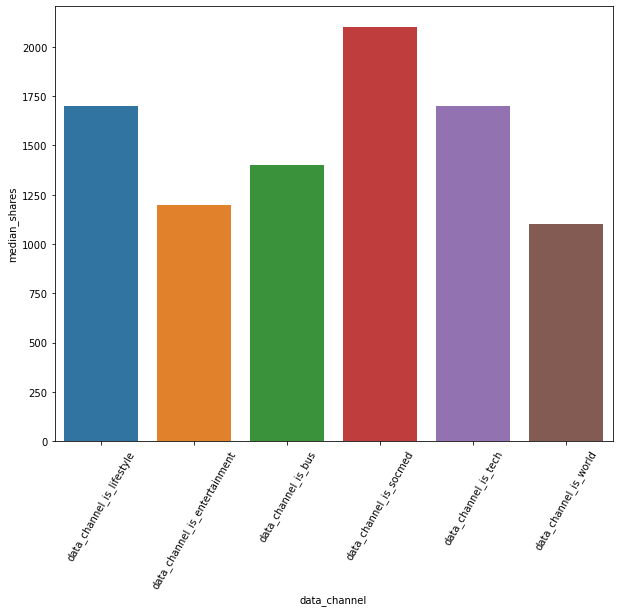

In [33]:
plt.figure(figsize= (10,8))
channel = []
cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
for d in cols:
    channel.append(data[data[d]==1]['shares'].median())

ax = sns.barplot(x = cols, y = channel)
ax.set(xlabel = 'data_channel', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

# 4. Outliers Treatment


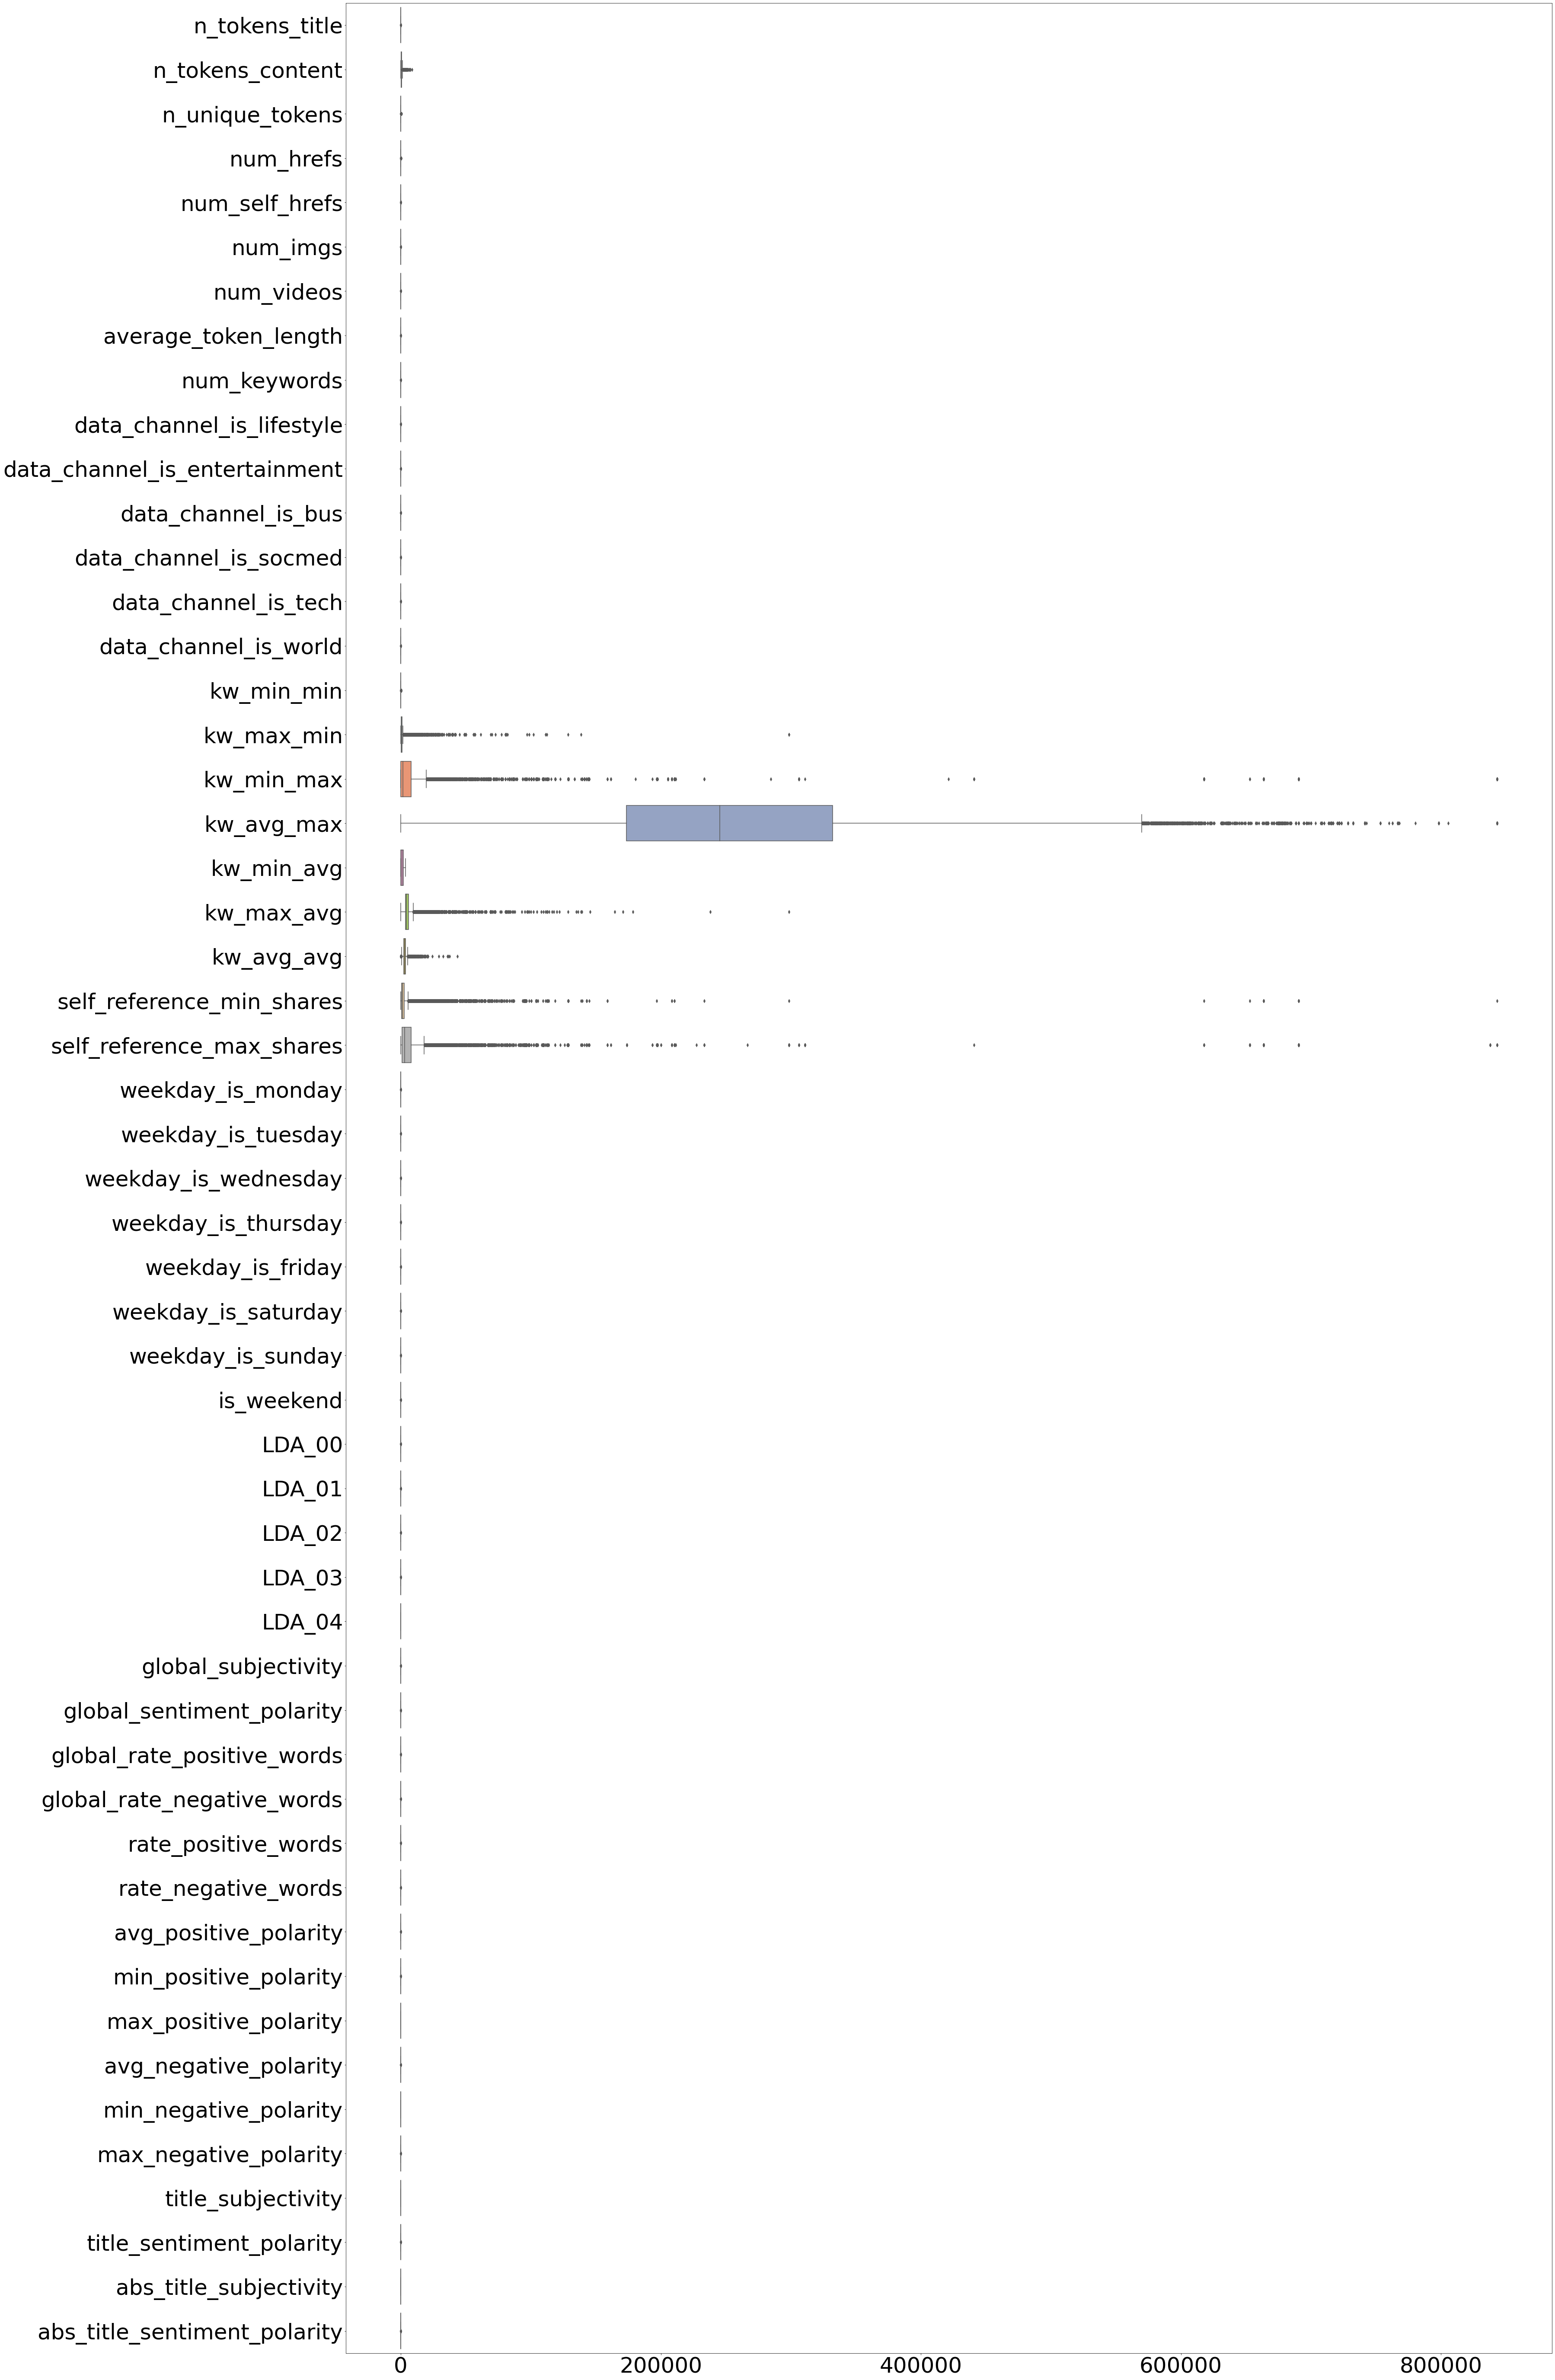

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 50, 'ytick.labelsize': 50}
plt.rcParams.update(**rc)

fig2, ax2 = plt.subplots(nrows=1, ncols=1,figsize=(50, 100))
b = sns.boxplot(data=X, orient="h", palette="Set2", ax = ax2)
plt.show()

## There are many outliers. Handling the outliers

In [35]:
# Finding negative value columns.
negcols=X.columns[(X<=0).any()]
negcols

Index(['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_ne

In [36]:
#converting negative values to positive values .

for i in negcols:
    m=X[i].min()
    name=i 
    print(name)
    X[name]=((X[i]+1)-m)

n_tokens_content
n_unique_tokens
num_hrefs
num_self_hrefs
num_imgs
num_videos
average_token_length
data_channel_is_lifestyle
data_channel_is_entertainment
data_channel_is_bus
data_channel_is_socmed
data_channel_is_tech
data_channel_is_world
kw_min_min
kw_max_min
kw_min_max
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
weekday_is_monday
weekday_is_tuesday
weekday_is_wednesday
weekday_is_thursday
weekday_is_friday
weekday_is_saturday
weekday_is_sunday
is_weekend
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
rate_positive_words
rate_negative_words
avg_positive_polarity
min_positive_polarity
max_positive_polarity
avg_negative_polarity
min_negative_polarity
max_negative_polarity
title_subjectivity
title_sentiment_polarity
abs_title_subjectivity
abs_title_sentiment_polarity


In [37]:
# Checking negative columns
negcols=X.columns[(X<=0).any()]
negcols

Index([], dtype='object')

In [38]:
# log transform with constant 10000 for real numbers
X = np.log((10000 + X))

In [39]:
# Treating Outlier
for col in X.columns:
    percentiles = X[col].quantile([0.01, 0.99]).values
    X[col][X[col] <= percentiles[0]] = percentiles[0]
    X[col][X[col] >= percentiles[1]] = percentiles[1]

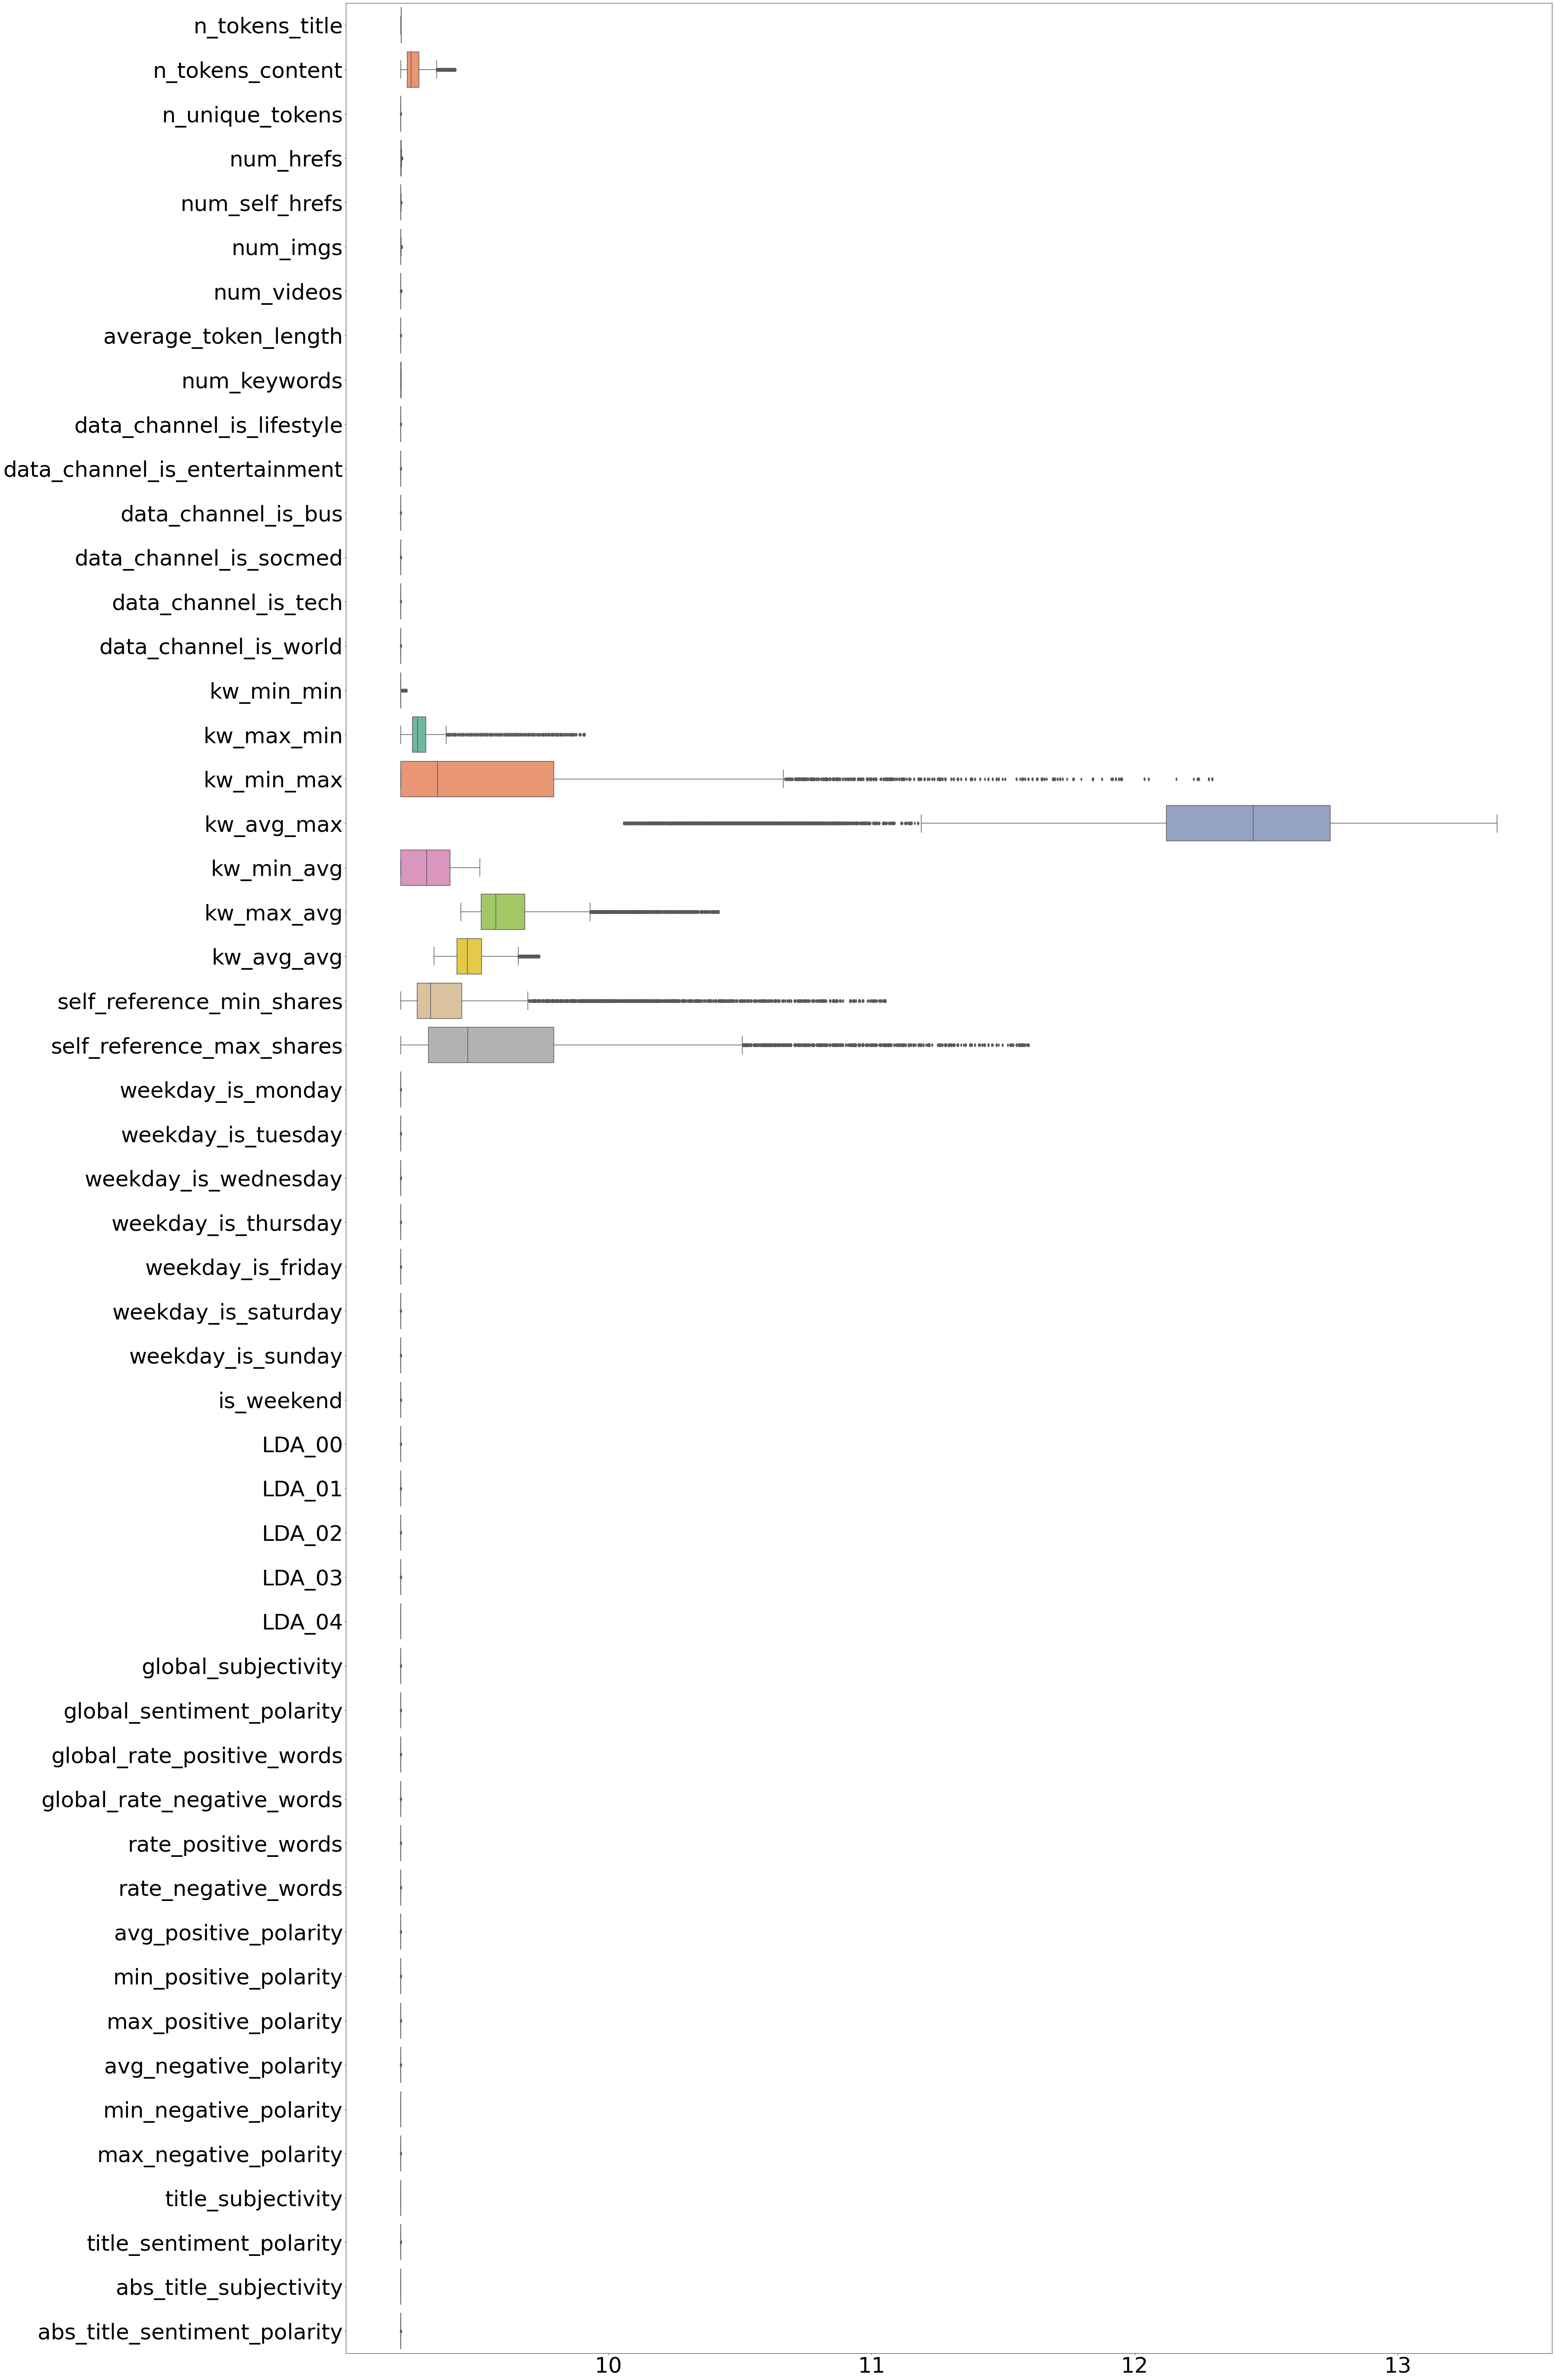

In [40]:
rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 50, 'ytick.labelsize': 50}
plt.rcParams.update(**rc)

fig2, ax2 = plt.subplots(nrows=1, ncols=1,figsize=(50, 100))
b = sns.boxplot(data=X, orient="h", palette="Set2", ax = ax2)
plt.show()

Scaling

In [41]:
scaler = StandardScaler()

X[:] = scaler.fit_transform(X)

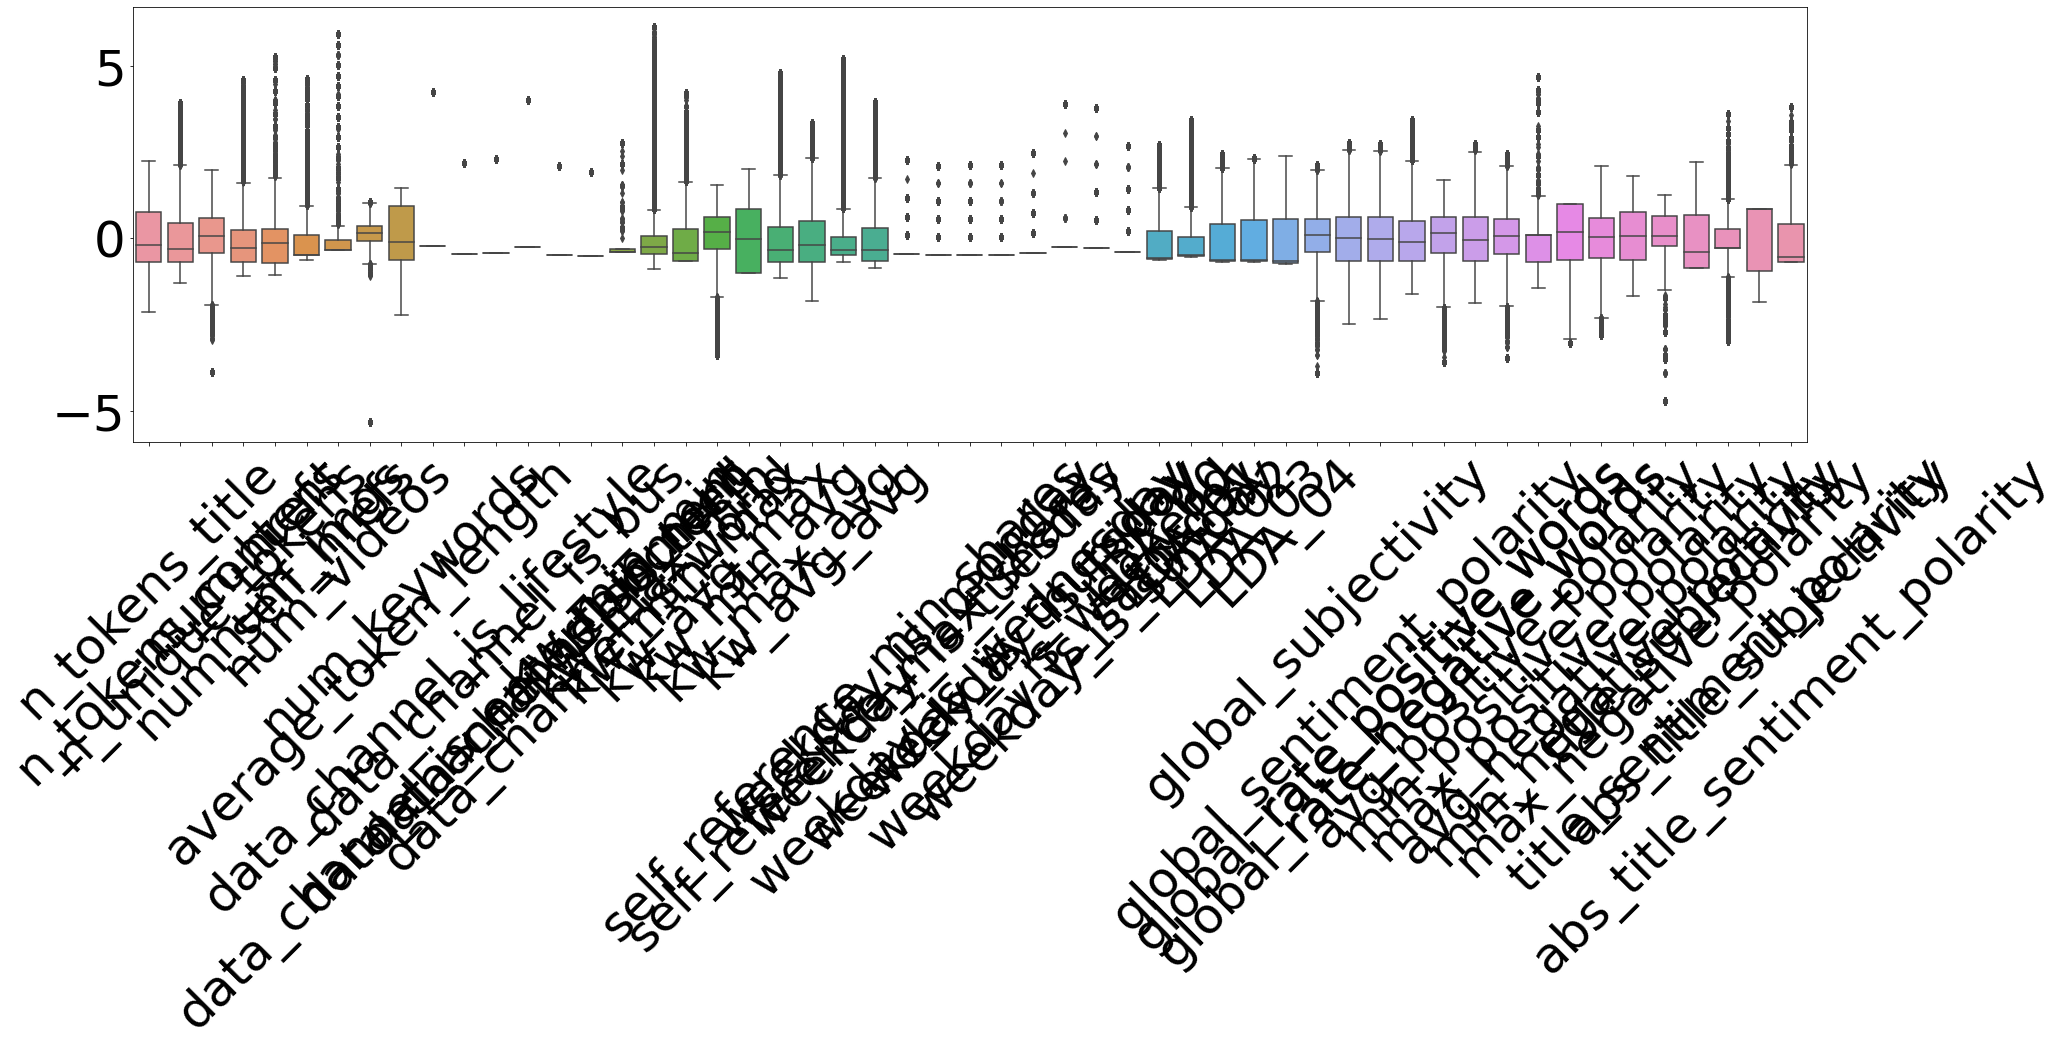

In [42]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=45)
sns.boxplot(data = X)
plt.show()

Outliers have been handled, now we can proceed with modelling 

# 5 . Model Building

In [43]:
#Spliting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(23786, 53) (23786,)
(5947, 53) (5947,)


In [44]:
X_train.head()

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
451         -1.642650         -0.236277        -0.185476  -0.880685   
18832       -1.158835          0.345176         0.051685  -0.472087   
1606        -0.191350          0.720844        -0.659276   0.140505   
7901        -1.158835         -0.742373         0.622065  -0.880685   
9469        -0.191350         -1.057972         1.641365  -0.472087   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
451         -0.922451 -0.492279   -0.050394              0.161339   
18832       -0.656266 -0.492279    2.633205             -0.197934   
1606        -1.055551 -0.492279   -0.348721             -0.150884   
7901        -0.390102 -0.492279   -0.050394             -0.524536   
9469         0.275213 -0.643162   -0.348721              0.167709   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
451       -0.644488                   -0.23579                      -0.461088   
18832      1.468131                   -0.23579                      -0.461088   
1606       0.411927                   -0.23579                      -0.461088   
7901       0.411927                   -0.23579                      -0.461088   
9469       0.940055                   -0.23579                      -0.461088   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
451              -0.433632               -0.249011             -0.476513   
18832            -0.433632               -0.249011             -0.476513   
1606             -0.433632               -0.249011             -0.476513   
7901             -0.433632               -0.249011              2.098579   
9469             -0.433632               -0.249011             -0.476513   

       data_channel_is_world  kw_min_min  kw_max_min  kw_min_max  kw_avg_max  \
451                 1.917221   -0.388585   -0.846825    2.250929    1.052088   
18832              -0.521588   -0.315417   -0.115521   -0.662510   -0.000418   
1606                1.917221   -0.388585    0.680812   -0.427787   -0.554845   
7901               -0.521588   -0.388585   -0.563899   -0.662510   -0.430085   
9469               -0.521588   -0.315417   -0.170725   -0.662510   -0.262713   

       kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  \
451      0.963491   -0.365911    0.797120                  -0.692211   
18832   -1.007437    2.881189    1.218120                  -0.692211   
1606     0.121713   -0.692098   -0.732307                  -0.692211   
7901    -1.007437   -0.674198   -1.752157                  -0.108833   
9469    -1.007437    1.418647    0.942852                   0.583772   

       self_reference_max_shares  weekday_is_monday  weekday_is_tuesday  \
451                    -0.862342          -0.455490           -0.483729   
18832                  -0.862342          -0.455490           -0.483729   
1606                   -0.862342          -0.455490           -0.483729   
7901                   -0.494829           2.255617           -0.483729   
9469                   -0.058505           2.255617           -0.483729   

       weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
451               -0.488803             2.112734          -0.412907   
18832              2.129477            -0.477739          -0.412907   
1606              -0.488803            -0.477739           2.477830   
7901              -0.488803            -0.477739          -0.412907   
9469              -0.488803            -0.477739          -0.412907   

       weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01  \
451              -0.256976          -0.274296   -0.396648 -0.576065 -0.490347   
18832            -0.256976          -0.274296   -0.396648 -0.626622 -0.001139   
1606             -0.256976          -0.274296   -0.396648 -0.607667 -0.528808   
7901             -0.256976          -0.274296   -0.396648 -0.607629 -0.528757   
9469             -0.2569

PCA

In [45]:
#initialize the pca with randomized
pca = PCA()
# fit the training dataset
pca.fit_transform(X_train)

array([[ 4.56660201e+00,  3.22957082e+00, -2.32908010e+00, ...,
        -1.39380560e-01, -7.60041599e-03, -1.16195005e-06],
       [-2.00742503e+00,  2.42641782e+00,  8.36350219e-01, ...,
        -1.50642164e-01, -1.92152442e-02, -6.19036153e-04],
       [ 1.42994361e-01, -9.67304613e-01, -1.33190608e+00, ...,
        -2.38417075e-01, -1.42674994e-02,  1.16572872e-03],
       ...,
       [-1.77389259e+00, -1.65570132e+00,  1.29612914e+00, ...,
         1.95951859e-01, -2.09346543e-01,  6.59743199e-04],
       [ 2.48110389e+00,  1.65623438e+00, -3.52582217e+00, ...,
         6.99775524e-02,  1.25786724e-02,  5.42503720e-04],
       [ 8.17495412e-01,  1.60802758e+00, -4.31435230e+00, ...,
         1.34564724e-01,  1.28493452e-02, -1.16572064e-04]])

In [46]:
pca.components_

array([[ 3.50825113e-02, -1.19456208e-01, -2.34040814e-01, ...,
        -5.46648188e-02,  2.59673716e-02, -6.41961192e-02],
       [ 6.76783439e-02,  4.20869392e-02, -5.51605592e-02, ...,
        -4.51334785e-02, -2.31553535e-02,  7.50163973e-02],
       [-5.55774523e-03, -1.37314735e-01, -6.56806189e-02, ...,
         1.46782643e-01, -7.61549336e-02,  1.03750908e-01],
       ...,
       [ 1.39431013e-02,  8.54263631e-02,  9.41083292e-02, ...,
         1.90482621e-03,  4.66210849e-05, -2.45631444e-03],
       [ 9.21272148e-04,  1.04705599e-03, -1.61956074e-03, ...,
        -1.50945262e-03, -1.12014125e-03, -2.42105454e-03],
       [ 4.97649785e-06, -1.53448528e-03, -2.08899345e-03, ...,
         5.93618023e-05,  1.42304820e-04, -3.25638171e-05]])

In [47]:
pca.explained_variance_ratio_

array([9.64601460e-02, 7.75089792e-02, 6.93031240e-02, 5.23564787e-02,
       4.59557104e-02, 4.41810572e-02, 3.87007032e-02, 3.69325426e-02,
       3.54962266e-02, 3.49735452e-02, 2.76164504e-02, 2.67908817e-02,
       2.47553755e-02, 2.33686646e-02, 2.30692323e-02, 2.28764821e-02,
       2.26613163e-02, 2.21653137e-02, 2.18584616e-02, 2.08077251e-02,
       1.98622598e-02, 1.88767799e-02, 1.71451309e-02, 1.63511910e-02,
       1.56289957e-02, 1.33066299e-02, 1.20235386e-02, 1.16310279e-02,
       1.11339386e-02, 1.00902455e-02, 9.31906939e-03, 8.76905015e-03,
       8.19435460e-03, 6.67780953e-03, 6.34851039e-03, 5.58095143e-03,
       5.19996898e-03, 4.85409926e-03, 4.55027870e-03, 3.90624604e-03,
       3.71486582e-03, 3.62552383e-03, 3.26795203e-03, 2.15328242e-03,
       1.97842753e-03, 1.70813454e-03, 1.43616742e-03, 1.34925074e-03,
       1.13122545e-03, 9.59631790e-04, 7.30751795e-04, 6.54274153e-04,
       2.01972086e-06])

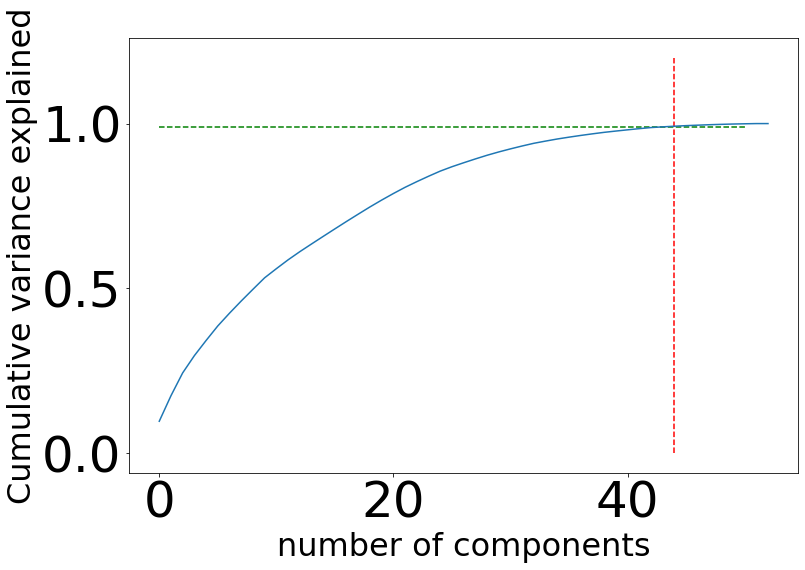

In [48]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=44, ymax=1.2, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [49]:
# We will perform with 44 components

In [50]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=44)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(23786, 44)

<AxesSubplot:>

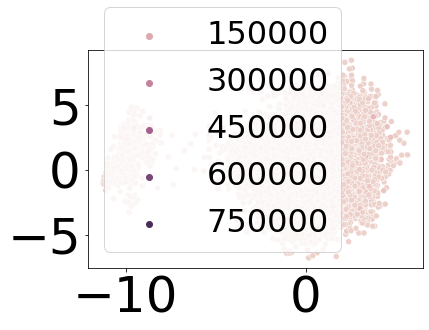

In [51]:
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1], hue=Y_train)

In [52]:
#correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())
#correlation matrix shape
corrmat.shape


(44, 44)

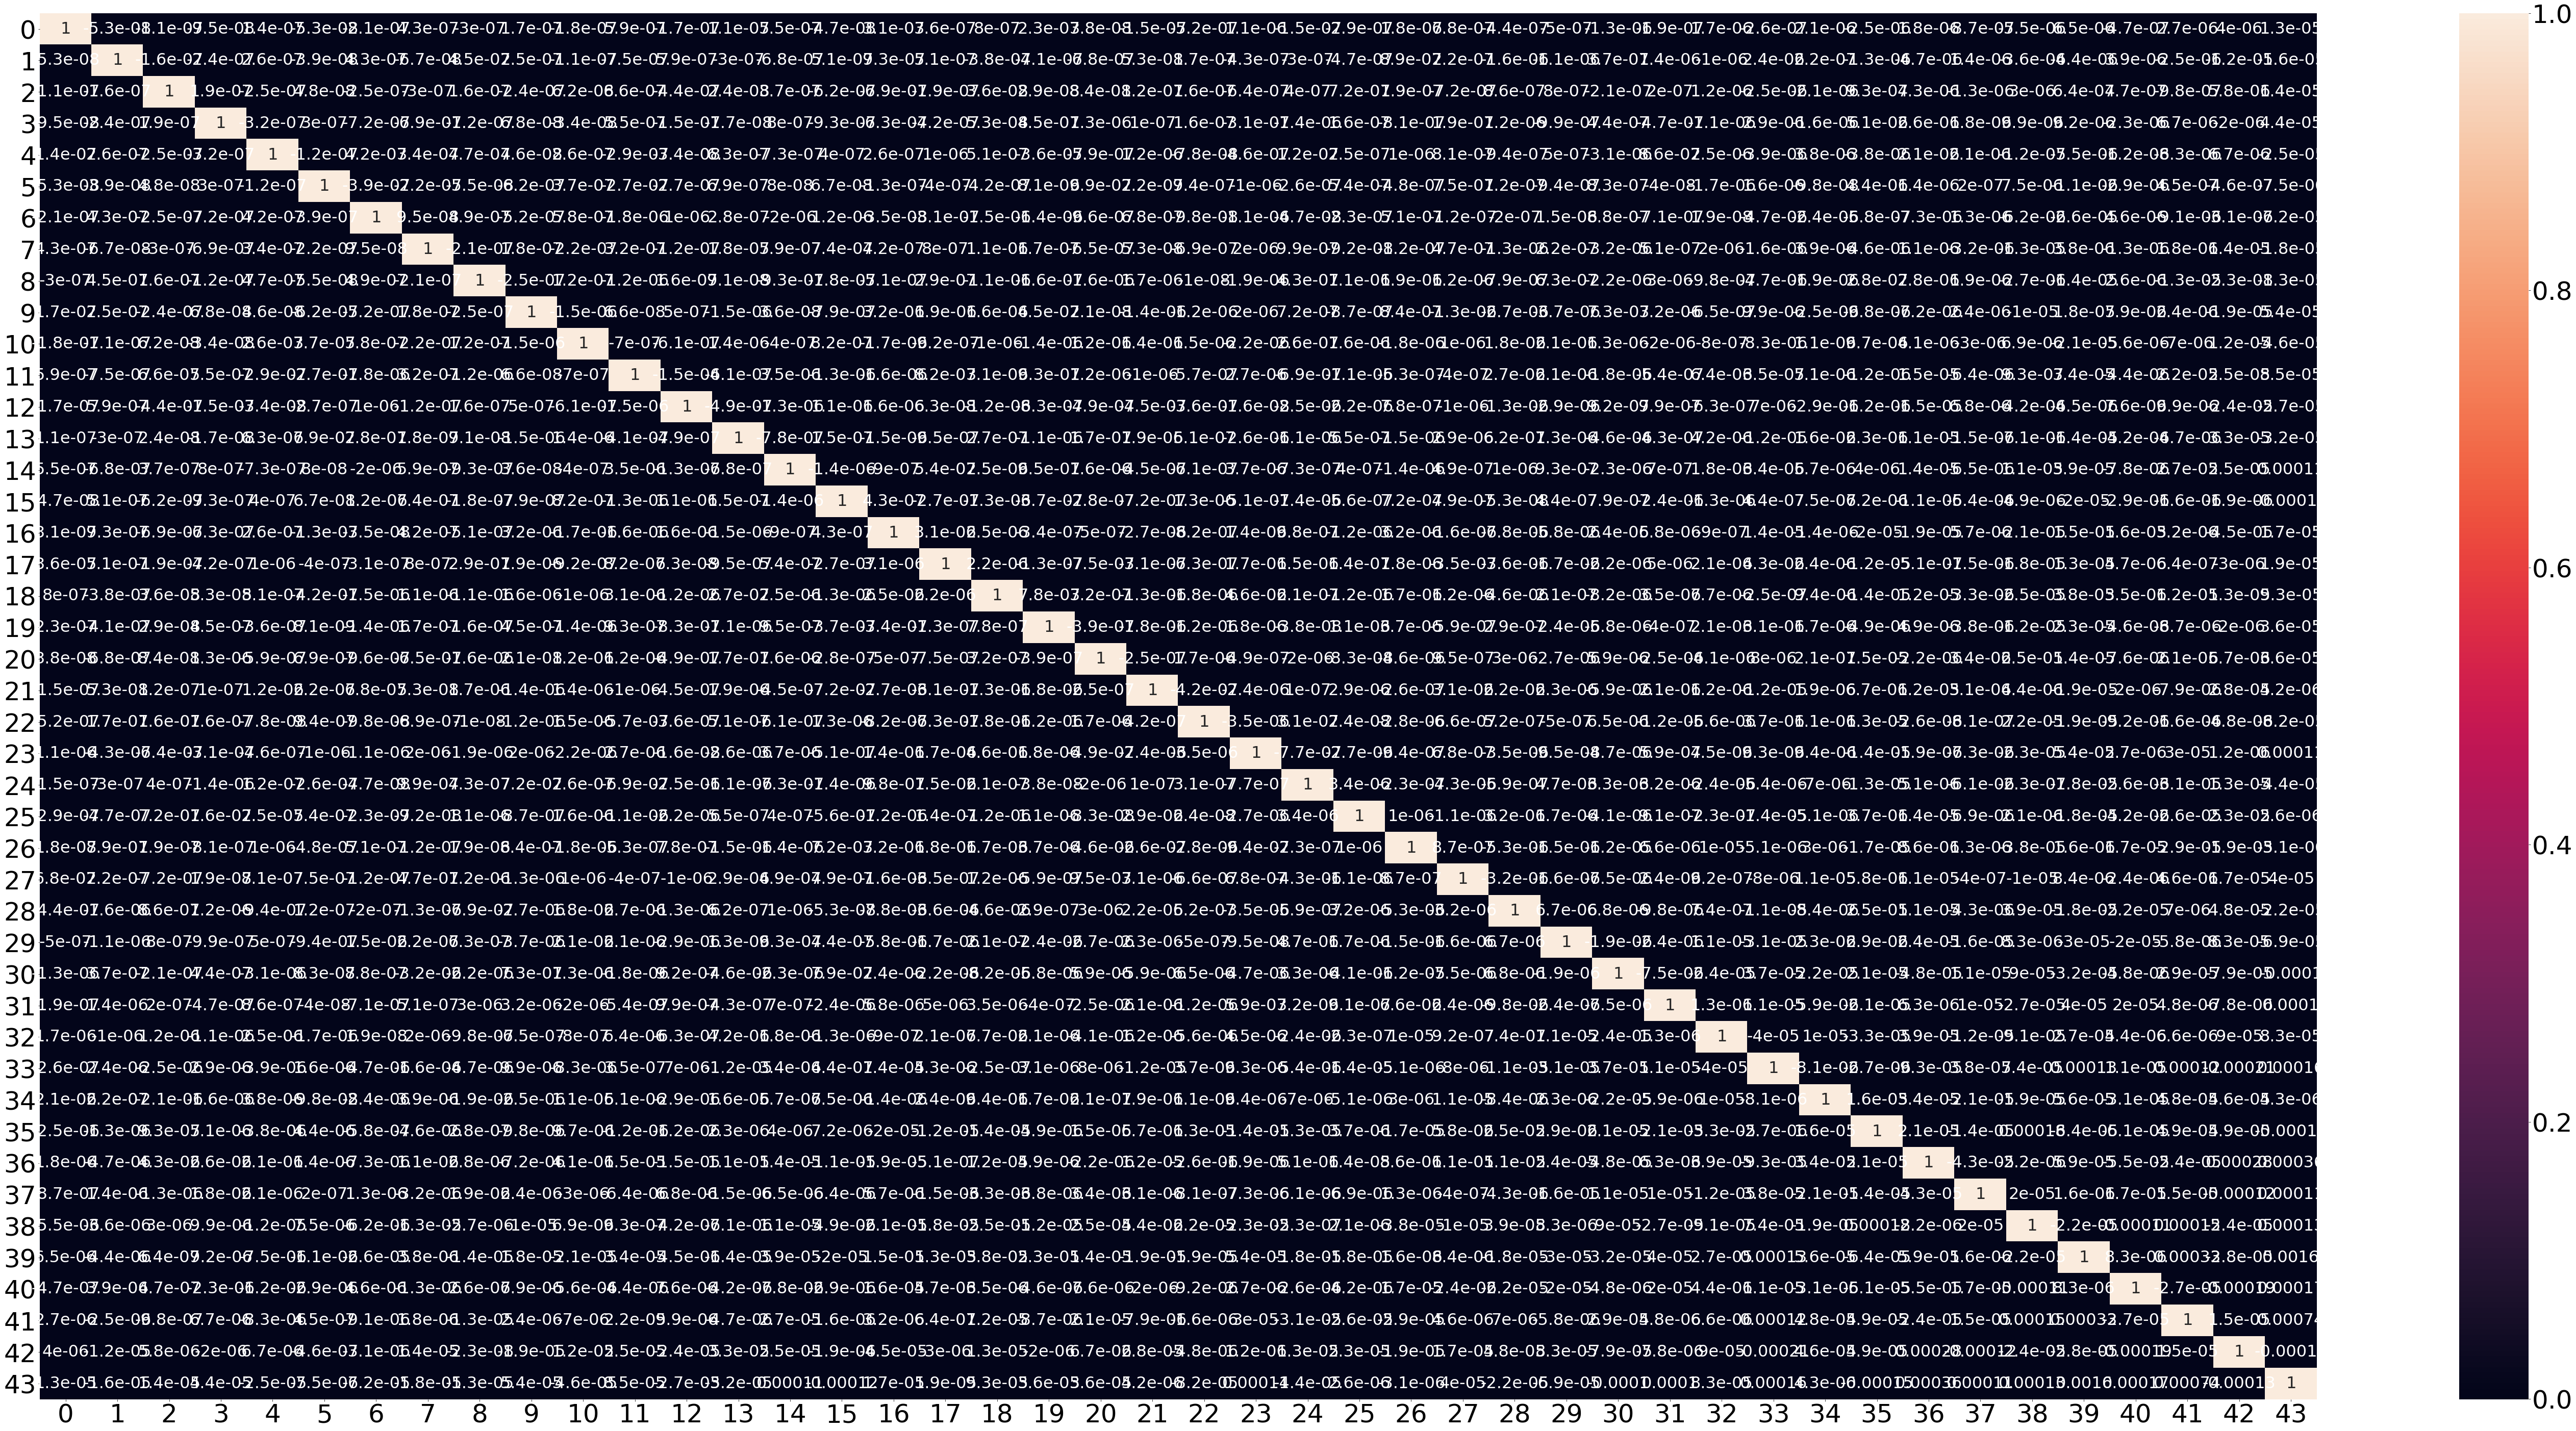

In [53]:
#Plotting the heatmap of the corr matrix
plt.figure(figsize=[100,50])
sns.heatmap(corrmat, annot=True)
plt.show()

There is no correlation, no multicolinarity

In [54]:
#Applying the transformation on the test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5947, 44)

#### BASELINE MODELLING

#### 1. LINEAR REGRESSION

In [55]:
# created a function to get all the valuable metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [56]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(df_train_pca, Y_train)
# predict the testing pca data
train_predict = lm.predict(df_train_pca)
test_predict = lm.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0219
r2:  0.0219
MAE:  3130.6311
MSE:  147034937.4855
RMSE:  12125.7964

Test metrics
explained_variance:  0.0211
r2:  0.0211
MAE:  3112.5323
MSE:  141273235.2537
RMSE:  11885.8418


#### 2. Ridge Regression

In [57]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(df_train_pca, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [59]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(df_train_pca, Y_train)
print(ridge.coef_)

[ 198.7382475   460.92715128 -440.12512284  165.61594186 -178.16990917
 -208.84899704  -37.31520131  -23.22519558  -25.978133    467.5137572
 -103.46056223  312.09327136  -88.47546824   13.75022525  116.51051263
  -53.63527472   25.59894726   92.3920816   104.22104881   81.93538923
   40.13564716 -242.51167469 -106.94183158  315.11660404  -76.00045576
   74.84119035  -84.30256114  112.83429659  279.20412714    7.94864602
  279.61794636  -72.99046922  465.80307609 -152.27566381   28.11025406
  123.28821614  357.21093487 -148.82339046  -84.39708384  -53.74158504
  379.21274923  -11.70731417  124.32229856  293.44190128]


In [60]:
# predict it now...
train_predict = ridge.predict(df_train_pca)
test_predict = ridge.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0219
r2:  0.0219
MAE:  3122.7682
MSE:  147041530.3931
RMSE:  12126.0682

Test metrics
explained_variance:  0.0214
r2:  0.0214
MAE:  3104.2359
MSE:  141230476.1353
RMSE:  11884.0429


In [61]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_train_pca, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [63]:
#Fitting Lasso model for alpha = 50 and printing coefficients which have been penalised

alpha =50
lasso = Lasso(alpha=alpha)
        
lasso.fit(df_train_pca, Y_train) 

Lasso(alpha=50)

In [64]:
lasso.coef_

array([ 1.90604337e+02,  4.53481743e+02, -4.31560704e+02,  1.50129897e+02,
       -1.60741795e+02, -1.91270479e+02, -1.37402915e+01, -0.00000000e+00,
       -1.75017435e-02,  4.51167379e+02, -7.23160796e+01,  2.86165140e+02,
       -5.32547802e+01,  0.00000000e+00,  7.96839886e+01, -1.43207177e+01,
        0.00000000e+00,  5.31914664e+01,  6.49076031e+01,  3.97809223e+01,
        0.00000000e+00, -2.02776731e+02, -5.69433276e+01,  2.72777073e+02,
       -1.95766448e+01,  8.50089698e+00, -1.15003292e+01,  3.95273455e+01,
        2.14454885e+02,  0.00000000e+00,  2.02256723e+02, -0.00000000e+00,
        3.95892430e+02, -2.92724710e+01,  0.00000000e+00,  0.00000000e+00,
        2.30560433e+02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.06461486e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [65]:
# predict it now...
train_predict = lasso.predict(df_train_pca)
test_predict = lasso.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.021
r2:  0.021
MAE:  3108.6651
MSE:  147172602.7921
RMSE:  12131.4716

Test metrics
explained_variance:  0.0214
r2:  0.0214
MAE:  3088.8122
MSE:  141231418.9238
RMSE:  11884.0826


# 6. CREATING SUBMISSION FILE

In [66]:
# checking the unknown data
unseen.head()

id                                                url  n_tokens_title  \
0  29733    http://mashable.com/2014/12/05/2014-cant-unsee/            10.0   
1  29734  http://mashable.com/2014/01/02/twitter-new-yea...            12.0   
2  29735  http://mashable.com/2014/06/11/gopro-value-3-b...            10.0   
3  29736  http://mashable.com/2014/10/08/spanish-ebola-d...            12.0   
4  29737  http://mashable.com/2014/02/09/jennifer-lawren...            11.0   

   n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             564.0         0.505618               1.0   
1            1127.0         0.431298               1.0   
2             400.0         0.564232               1.0   
3             798.0         0.435279               1.0   
4            1010.0         0.464503               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.637394       21.0             1.0       0.0         3.0   
1                  0.621622       10.0             6.0      11.0         0.0   
2                  0.698795        1.0             0.0       1.0         1.0   
3                  0.613054        2.0             2.0       3.0         1.0   
4                  0.611727       32.0             2.0       1.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.723404           5.0                        0.0   
1              4.360248           8.0                        0.0   
2              4.765000           7.0                        0.0   
3              3.984962           9.0                        0.0   
4              5.180198           8.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            0.0                  0.0                     0.0   
1                            0.0                  0.0                     0.0   
2                            1.0                  0.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    1.0        -1.0       442.0   
1                   1.0                    0.0        -1.0       733.0   
2                   0.0                    0.0        -1.0       784.0   
3                   0.0                    0.0        -1.0       796.0   
4                   0.0                    1.0        -1.0       269.0   

   kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
0  128.000000     23700.0    843300.0  340780.000000  2154.061235   
1  254.875000      6300.0    843300.0  140325.000000  1671.078652   
2  283.285714      6800.0    843300.0  166071.428571  1828.500000   
3  284.222222      1800.0    843300.0  325322.222222  1059.333333   
4   91.714286         0.0    843300.0  214137.500000     0.000000   

    kw_max_avg   kw_avg_avg  self_reference_min_shares  \
0  3702.951220  2994.958581                     2300.0   
1  4040.166667  2704.175559                     3500.0   
2  3575.518291  2645.535689                        0.0   
3  7735.494465  3966.507513                     6300.0   
4  3583.632001  2030.692327                     1500.0   

   self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  \
0                     2300.0                      2300.0                1.0   
1                     6300.0                      4900.0                0.0   
2                        0.0                         0.0                0.0   
3                     6300.0                      6300.0                0.0   
4                        NaN                      1500.0                0.0   

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0                 0.0                   0.0          

In [67]:
submission_data = unseen.set_index('id')[X_train.columns]
submission_data.shape

(9911, 53)

In [68]:
missing_data_percent1=round(100 *(submission_data.isnull().sum()/len(submission_data.index)),2)
missing_data_percent1

n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
num_hrefs                         2.76
num_self_hrefs                   16.17
num_imgs                         18.75
num_videos                        2.14
average_token_length              0.00
num_keywords                      1.70
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.60
kw_max_min                        1.37
kw_min_max                        0.32
kw_avg_max                        0.34
kw_min_avg                        1.08
kw_max_avg                        2.27
kw_avg_avg                        2.95
self_reference_min_shares         1.07
self_reference_max_shares         5.33
weekday_is_monday                 3.27
weekday_is_tuesday       

In [69]:
# imputing missing values
impute_features1 = missing_data_percent1[missing_data_percent1.gt(0)].index
impute_features1

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [70]:
# Imputed with KNN Imputer
imp= KNNImputer()
submission_data[impute_features1] = imp.fit_transform(submission_data[impute_features1])

In [71]:
#Checking the Null values again 
round(100 *(submission_data.isnull().sum()/len(submission_data.index)),2)

n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_min_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
kw_avg_avg                       0.0
self_reference_min_shares        0.0
self_reference_max_shares        0.0
weekday_is_monday                0.0
weekday_is_tuesday               0.0
weekday_is_wednesday             0.0
w

In [72]:
submission_data = pca_final.transform(submission_data)
submission_data.shape

(9911, 44)

In [73]:
# We ll go for Ridge regression as it has the lowest RMSE
unseen["Shares"] = ridge.predict(submission_data)
output = unseen[['id','Shares']]
output.head()

id        Shares
0  29733  2.161848e+07
1  29734  1.500413e+07
2  29735  1.179827e+07
3  29736  3.029306e+07
4  29737  1.699324e+07

In [74]:
output.to_csv('submission_regression_pca_ridge_lasso_lr_Kalpesh-final.csv',index=False)